In [1]:
from scripts import pricing_ai
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt
import re
import jaconv

sns.set()
pd.set_option('display.max_rows',200)

In [2]:
df = pricing_ai.get_preprocessing_data2()
df.reset_index(inplace=True, drop=True)

In [4]:
df['price_rank'] = df[df.diff_price != 0].groupby('stock_id').price.transform(lambda x: x.rank(method='dense',ascending=False))
df['price_rank'] = df['price_rank'].fillna(0)

In [7]:
df.loc[df[df.price_rank==2].drop_duplicates(subset=['stock_id', 'price_rank']).index, 'second_price_change_flg'] = 1

In [11]:
df['second_price_change_flg']= df.second_price_change_flg.fillna(0)

In [14]:
df[df.diff_price !=0]

,date,stock_id,price,end_day,start_day,min_price,max_price,diff_price,car_name,price_rank,second_price_change_flg
1,2020-03-21,0100012A20200321Q001,1890000,2021-08-05,2020-03-21,1730000,1890000,160000,ヴェゼル,1.0,0.0
2,2020-03-22,0100012A20200321Q001,1890000,2021-08-05,2020-03-21,1730000,1890000,160000,ヴェゼル,1.0,0.0
3,2020-03-23,0100012A20200321Q001,1890000,2021-08-05,2020-03-21,1730000,1890000,160000,ヴェゼル,1.0,0.0
4,2020-03-24,0100012A20200321Q001,1890000,2021-08-05,2020-03-21,1730000,1890000,160000,ヴェゼル,1.0,0.0
5,2020-03-25,0100012A20200321Q001,1890000,2021-08-05,2020-03-21,1730000,1890000,160000,ヴェゼル,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
47388338,2021-11-09,9940003A30210921W003,899000,2021-11-14,2021-09-21,899000,959000,60000,アウディ Ａ１,2.0,0.0
47388339,2021-11-10,9940003A30210921W003,899000,2021-11-14,2021-09-21,899000,959000,60000,アウディ Ａ１,2.0,0.0
47388340,2021-11-11,9940003A30210921W003,899000,2021-11-14,2021-09-21,899000,959000,60000,アウディ Ａ１,2.0,0.0
47388341,2021-11-12,9940003A30210921W003,899000,2021-11-14,2021-09-21,899000,959000,60000,アウディ Ａ１,2.0,0.0


In [15]:
priceDown_stock_id = df[df.diff_price !=0].stock_id.unique()
num = random.randint(0, len(priceDown_stock_id))

In [63]:
# stock_id = priceDown_stock_id[random.randint(0, len(priceDown_stock_id))]
# print(stock_id)
# df[(df.diff_price != 0) & (df.stock_id == stock_id)].head(30)

In [4]:
df[(df.diff_price !=0) & (df.stock_id == priceDown_stock_id[num])].drop_duplicates(subset=['stock_id', 'price'])

,date,stock_id,price,end_day,start_day,min_price,max_price,diff_price,car_name
14191865,2020-06-27,0503263A30200627W001,195000,2020-07-26,2020-06-27,125000,195000,70000,エブリイ
14191885,2020-07-17,0503263A30200627W001,125000,2020-07-26,2020-06-27,125000,195000,70000,エブリイ


In [5]:
df.loc[:, 'discount_num'] = df.groupby(['stock_id']).price.transform(lambda x :len(set(x))-1) 

In [96]:
df[(df.diff_price != 0) & (df.stock_id == priceDown_stock_id[random.randint(0, len(priceDown_stock_id))])].head()

,date,stock_id,price,end_day,start_day,min_price,max_price,diff_price,car_name,discount_num,price_rank,second_price_change_flg,second_price_keisaiday
4683600,2020-10-27,0207316A20201027Q006,599000,2021-02-14,2020-10-27,499000,599000,100000,ミライース,2,1.0,0.0,NaN
4683601,2020-10-28,0207316A20201027Q006,599000,2021-02-14,2020-10-27,499000,599000,100000,ミライース,2,1.0,0.0,NaN
4683602,2020-10-29,0207316A20201027Q006,599000,2021-02-14,2020-10-27,499000,599000,100000,ミライース,2,1.0,0.0,NaN
4683603,2020-10-30,0207316A20201027Q006,599000,2021-02-14,2020-10-27,499000,599000,100000,ミライース,2,1.0,0.0,NaN
4683604,2020-10-31,0207316A20201027Q006,599000,2021-02-14,2020-10-27,499000,599000,100000,ミライース,2,1.0,0.0,NaN


中央値 2.0


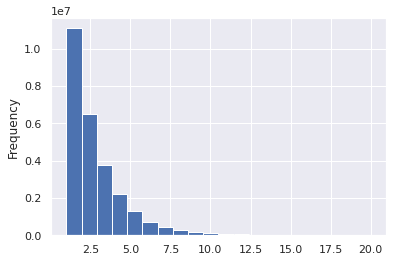

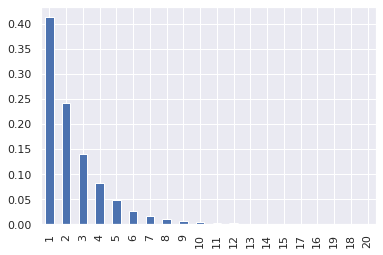

In [10]:
df[(df.discount_num !=0) & (df.discount_num <= 20)].discount_num.plot.hist(bins=20)
print('中央値', df[(df.discount_num !=0) & (df.discount_num <= 20)].discount_num.median())
plt.show()
df[(df.discount_num !=0) & (df.discount_num <= 20)].discount_num.value_counts(normalize=True).plot.bar()
plt.show()

In [11]:
df['price_rank'] = df[df.diff_price != 0].groupby('stock_id').price.transform(lambda x: x.rank(method='dense',ascending=False))
df.price_rank = df.price_rank.fillna(0)

In [69]:
df.second_price_keisaiday.dropna().median(),df.second_price_keisaiday.dropna().mean()

(23.0, 36.23752561926915)

In [12]:
df[df.price_rank==2].drop_duplicates(subset=['price_rank'])

,date,stock_id,price,end_day,start_day,min_price,max_price,diff_price,car_name,discount_num,price_rank
52,2020-05-11,0100012A20200321Q001,1780000,2021-08-05,2020-03-21,1730000,1890000,160000,ヴェゼル,2,2.0


In [19]:
df.loc[df[df.price_rank==2].drop_duplicates(subset=['stock_id', 'price_rank']).index, 'second_price_change_flg'] = 1

In [23]:
df.second_price_change_flg = df.second_price_change_flg.fillna(0)

In [33]:
df.loc[df.second_price_change_flg == 1, 'second_price_keisaiday'] = df[df.second_price_change_flg == 1]['date'] - df[df.second_price_change_flg == 1]['start_day']

In [45]:
df['second_price_keisaiday'] = df['second_price_keisaiday'].astype('timedelta64[D]', errors='ignore')

<AxesSubplot:ylabel='Frequency'>

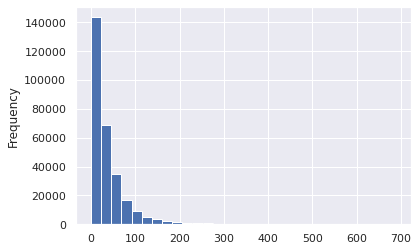

In [58]:
df.second_price_keisaiday.dropna().plot.hist(bins=30)

In [64]:
df.second_price_keisaiday.median()

23.0

In [64]:
df

,date,stock_id,price,end_day,start_day,min_price,max_price,diff_price,car_name,price_rank,second_price_change_flg
0,2021-12-13,0100001A30210419W003,91000000,2021-12-18,2021-12-13,91000000,91000000,0,ダスター,0.0,0.0
1,2020-03-21,0100012A20200321Q001,1890000,2021-08-05,2020-03-21,1730000,1890000,160000,ヴェゼル,1.0,0.0
2,2020-03-22,0100012A20200321Q001,1890000,2021-08-05,2020-03-21,1730000,1890000,160000,ヴェゼル,1.0,0.0
3,2020-03-23,0100012A20200321Q001,1890000,2021-08-05,2020-03-21,1730000,1890000,160000,ヴェゼル,1.0,0.0
4,2020-03-24,0100012A20200321Q001,1890000,2021-08-05,2020-03-21,1730000,1890000,160000,ヴェゼル,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
47388774,2021-07-25,9950045A30210706W001,280000,2021-07-30,2021-07-06,280000,280000,0,サンバートラック,0.0,0.0
47388775,2021-07-26,9950045A30210706W001,280000,2021-07-30,2021-07-06,280000,280000,0,サンバートラック,0.0,0.0
47388776,2021-07-27,9950045A30210706W001,280000,2021-07-30,2021-07-06,280000,280000,0,サンバートラック,0.0,0.0
47388777,2021-07-28,9950045A30210706W001,280000,2021-07-30,2021-07-06,280000,280000,0,サンバートラック,0.0,0.0


In [14]:
df.loc[df.diff_price !=0, 'discount_num'] = df[(df.diff_price !=0)].groupby(['stock_id', 'price'])['price'].transform(lambda x: x.nunique())

In [16]:
df.discount_num.value_counts()

1.0    26877346
Name: discount_num, dtype: int64

# *************************************************************************************************************************************************************************

In [66]:
df.loc[df[(df.min_price == df.price) & (df.diff_price !=0)].drop_duplicates(subset='stock_id',keep='first').index.to_list()]

,date,stock_id,price,end_day,start_day,min_price,max_price,diff_price,car_name,price_rank,second_price_change_flg
141,2020-08-08,0100012A20200321Q001,1730000,2021-08-05,2020-03-21,1730000,1890000,160000,ヴェゼル,3.0,0.0
338,2020-06-11,0100012A20200321Q004,590000,2020-06-14,2020-03-21,590000,680000,90000,Ｎ－ＯＮＥ,3.0,0.0
467,2020-08-08,0100012A20200404Q001,850000,2021-08-05,2020-04-04,850000,990000,140000,プリウスアルファ,4.0,0.0
793,2020-08-08,0100012A20200613Q001,2780000,2020-11-17,2020-06-13,2780000,2850000,70000,エルグランド,2.0,1.0
891,2020-08-08,0100012A20200627Q001,890000,2021-08-05,2020-06-27,890000,920000,30000,ＮＴ１００クリッパートラック,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
47387938,2021-04-16,9940003A30210326W001,1359000,2021-05-05,2021-03-26,1359000,1399000,40000,ソリオバンディット,2.0,1.0
47388047,2021-08-06,9940003A30210613W003,799000,2021-08-22,2021-06-13,799000,899000,100000,パッソ,2.0,1.0
47388149,2021-09-17,9940003A30210707W001,899000,2021-09-28,2021-07-07,899000,999000,100000,アルトターボＲＳ,3.0,0.0
47388262,2021-11-25,9940003A30210814W001,3139000,2021-12-14,2021-08-14,3139000,3299000,160000,ハイエースバン,3.0,0.0


In [67]:
df.loc[df[(df.min_price == df.price) & (df.diff_price !=0)].drop_duplicates(subset='stock_id',keep='first').index.to_list(),'final_price_date_flg'] = 1

In [68]:
df.final_price_date_flg.fillna(0, inplace=True)

In [93]:
df.loc[df.final_price_date_flg==1, 'final_price_date'] = df[(df.final_price_date_flg==1)]['end_day'] - df[(df.final_price_date_flg==1)]['date']
df.loc[df.final_price_date_flg==1, 'tofinal_price_date'] = df[(df.final_price_date_flg==1)]['date'] - df[(df.final_price_date_flg==1)]['start_day']

In [94]:
df.loc[df.final_price_date_flg==0, 'final_price_date'] = -1

In [95]:
df['final_price_date'] = df.final_price_date.astype('timedelta64[D]', errors='ignore')
df['tofinal_price_date'] = df.tofinal_price_date.astype('timedelta64[D]', errors='ignore')

In [96]:
df[df.final_price_date_flg != 0].final_price_date.astype('timedelta64[D]').median(),\
df[df.final_price_date_flg != 0].tofinal_price_date.astype('timedelta64[D]').median()

(32.0, Timedelta('41 days 00:00:00'))

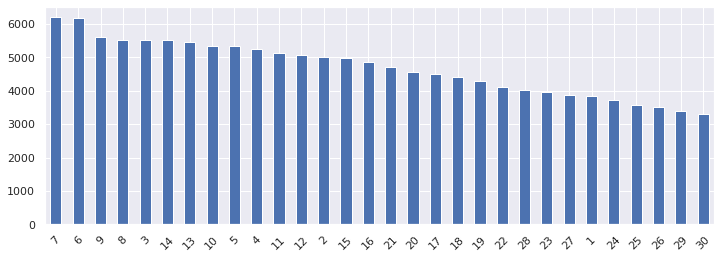

In [107]:
plt.figure(figsize=(12, 4))
df[df.final_price_date_flg != 0].final_price_date.astype('timedelta64[D]').astype(int).value_counts().head(30).plot.bar()
plt.xticks(rotation=45)
plt.show()

<AxesSubplot:ylabel='Frequency'>

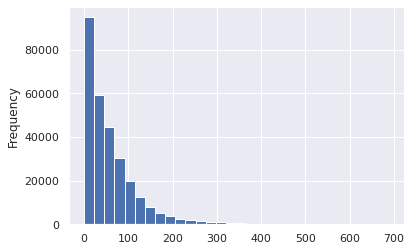

In [130]:
df[df.final_price_date_flg != 0]['tofinal_price_date'].plot.hist(bins=30)

In [137]:
df[df.tofinal_price_date ==0]

,date,stock_id,price,end_day,start_day,min_price,max_price,diff_price,car_name,price_rank,second_price_change_flg,final_price_date_flg,final_price_date,tofinal_price_date
6280,2020-06-27,0100036A30200627W002,650000,2020-09-05,2020-06-27,650000,680000,30000,ノート,2.0,1.0,1.0,70 days,0.0
16999,2020-12-17,0100075A20201217E001,1980000,2021-02-07,2020-12-17,1980000,2000000,20000,エクストレイル,2.0,1.0,1.0,52 days,0.0
28330,2020-08-31,0100132A20200831E016,1499000,2021-01-08,2020-08-31,1499000,1699000,200000,セレナ,5.0,0.0,1.0,130 days,0.0
38163,2020-12-03,0100169A20201203E002,950000,2021-01-13,2020-12-03,950000,958000,8000,Ｎ－ＢＯＸ,2.0,1.0,1.0,41 days,0.0
40444,2021-11-04,0100171A20211104E001,286000,2021-11-21,2021-11-04,286000,360000,74000,ティーダ,3.0,0.0,1.0,17 days,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47379868,2020-04-19,9900171A30200419W001,480000,2020-07-28,2020-04-19,480000,580000,100000,シボレーソニック,2.0,1.0,1.0,100 days,0.0
47380649,2020-04-26,9900172A30200426W001,2090000,2020-05-15,2020-04-26,2090000,2190000,100000,ＢＭＷ Ｘ１,3.0,0.0,1.0,19 days,0.0
47381189,2021-02-14,9900175A30210214W002,60000,2021-04-04,2021-02-14,60000,100000,40000,ブルーバードシルフィ,2.0,1.0,1.0,49 days,0.0
47386005,2021-04-08,9900181A30210406W001,98000,2021-04-24,2021-04-08,98000,120000,22000,デミオ,2.0,1.0,1.0,16 days,0.0


In [140]:
df[df.stock_id == '0100171A20211104E001']

,date,stock_id,price,end_day,start_day,min_price,max_price,diff_price,car_name,price_rank,second_price_change_flg,final_price_date_flg,final_price_date,tofinal_price_date
40444,2021-11-04,0100171A20211104E001,286000,2021-11-21,2021-11-04,286000,360000,74000,ティーダ,3.0,0.0,1.0,17 days,0.0
40445,2021-11-05,0100171A20211104E001,286000,2021-11-21,2021-11-04,286000,360000,74000,ティーダ,3.0,0.0,0.0,-1 days,NaN
40446,2021-11-06,0100171A20211104E001,286000,2021-11-21,2021-11-04,286000,360000,74000,ティーダ,3.0,0.0,0.0,-1 days,NaN
40447,2021-11-07,0100171A20211104E001,360000,2021-11-21,2021-11-04,286000,360000,74000,ティーダ,1.0,0.0,0.0,-1 days,NaN
40448,2021-11-08,0100171A20211104E001,360000,2021-11-21,2021-11-04,286000,360000,74000,ティーダ,1.0,0.0,0.0,-1 days,NaN
40449,2021-11-09,0100171A20211104E001,360000,2021-11-21,2021-11-04,286000,360000,74000,ティーダ,1.0,0.0,0.0,-1 days,NaN
40450,2021-11-10,0100171A20211104E001,360000,2021-11-21,2021-11-04,286000,360000,74000,ティーダ,1.0,0.0,0.0,-1 days,NaN
40451,2021-11-11,0100171A20211104E001,360000,2021-11-21,2021-11-04,286000,360000,74000,ティーダ,1.0,0.0,0.0,-1 days,NaN
40452,2021-11-12,0100171A20211104E001,360000,2021-11-21,2021-11-04,286000,360000,74000,ティーダ,1.0,0.0,0.0,-1 days,NaN
40453,2021-11-13,0100171A20211104E001,360000,2021-11-21,2021-11-04,286000,360000,74000,ティーダ,1.0,0.0,0.0,-1 days,NaN


In [113]:
df.loc[(df.final_price_date_flg==1) & (df.tofinal_price_date ==0)]

,date,stock_id,price,end_day,start_day,min_price,max_price,diff_price,car_name,price_rank,second_price_change_flg,final_price_date_flg,final_price_date,tofinal_price_date
6280,2020-06-27,0100036A30200627W002,650000,2020-09-05,2020-06-27,650000,680000,30000,ノート,2.0,1.0,1.0,70 days,0.0
16999,2020-12-17,0100075A20201217E001,1980000,2021-02-07,2020-12-17,1980000,2000000,20000,エクストレイル,2.0,1.0,1.0,52 days,0.0
28330,2020-08-31,0100132A20200831E016,1499000,2021-01-08,2020-08-31,1499000,1699000,200000,セレナ,5.0,0.0,1.0,130 days,0.0
38163,2020-12-03,0100169A20201203E002,950000,2021-01-13,2020-12-03,950000,958000,8000,Ｎ－ＢＯＸ,2.0,1.0,1.0,41 days,0.0
40444,2021-11-04,0100171A20211104E001,286000,2021-11-21,2021-11-04,286000,360000,74000,ティーダ,3.0,0.0,1.0,17 days,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47379868,2020-04-19,9900171A30200419W001,480000,2020-07-28,2020-04-19,480000,580000,100000,シボレーソニック,2.0,1.0,1.0,100 days,0.0
47380649,2020-04-26,9900172A30200426W001,2090000,2020-05-15,2020-04-26,2090000,2190000,100000,ＢＭＷ Ｘ１,3.0,0.0,1.0,19 days,0.0
47381189,2021-02-14,9900175A30210214W002,60000,2021-04-04,2021-02-14,60000,100000,40000,ブルーバードシルフィ,2.0,1.0,1.0,49 days,0.0
47386005,2021-04-08,9900181A30210406W001,98000,2021-04-24,2021-04-08,98000,120000,22000,デミオ,2.0,1.0,1.0,16 days,0.0


In [73]:
df.loc[df['final_price_date'] !=0, 'final_price_date'] = df[df['final_price_date'] !=0].final_price_date.values.astype('timedelta64[D]').astype(int)

In [76]:
df

,date,stock_id,price,end_day,start_day,min_price,max_price,diff_price,car_name,price_rank,second_price_change_flg,final_price_date_flg,final_price_date
0,2021-12-13,0100001A30210419W003,91000000,2021-12-18,2021-12-13,91000000,91000000,0,ダスター,0.0,0.0,0.0,-9.223372e+18
1,2020-03-21,0100012A20200321Q001,1890000,2021-08-05,2020-03-21,1730000,1890000,160000,ヴェゼル,1.0,0.0,0.0,-9.223372e+18
2,2020-03-22,0100012A20200321Q001,1890000,2021-08-05,2020-03-21,1730000,1890000,160000,ヴェゼル,1.0,0.0,0.0,-9.223372e+18
3,2020-03-23,0100012A20200321Q001,1890000,2021-08-05,2020-03-21,1730000,1890000,160000,ヴェゼル,1.0,0.0,0.0,-9.223372e+18
4,2020-03-24,0100012A20200321Q001,1890000,2021-08-05,2020-03-21,1730000,1890000,160000,ヴェゼル,1.0,0.0,0.0,-9.223372e+18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47388774,2021-07-25,9950045A30210706W001,280000,2021-07-30,2021-07-06,280000,280000,0,サンバートラック,0.0,0.0,0.0,-9.223372e+18
47388775,2021-07-26,9950045A30210706W001,280000,2021-07-30,2021-07-06,280000,280000,0,サンバートラック,0.0,0.0,0.0,-9.223372e+18
47388776,2021-07-27,9950045A30210706W001,280000,2021-07-30,2021-07-06,280000,280000,0,サンバートラック,0.0,0.0,0.0,-9.223372e+18
47388777,2021-07-28,9950045A30210706W001,280000,2021-07-30,2021-07-06,280000,280000,0,サンバートラック,0.0,0.0,0.0,-9.223372e+18


In [75]:
df[df.final_price_date != 0].final_price_date.min()

-9.223372036854776e+18

In [66]:
df[(df.final_price_date != 0)].shape

(289294, 11)

<AxesSubplot:ylabel='Frequency'>

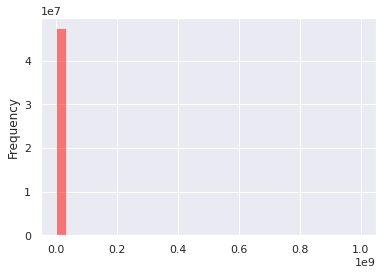

In [5]:
df[(df.final_price_date != 0) & (df.final_price_date > 0)].final_price_date.plot.hist(bins=30 ,color='red')

In [112]:
data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAaEAAAD7CAYAAADDyivnAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8qNh9FAAAACXBIWXMAAAsTAAALEwEAmpwYAAAWEklEQVR4nO3df5Bd5X3f8ffu8kOqJWOzLMZgMIaib1yq4oIdkwbbdWs3TWpKAJuWGnCbpjGUmGnGTVw7MSRu41EJJBlbSqRpygwFmzSUhB/NpDCZxMEE47o2uCWpvxCCAAO2lhWpJYIktLv945yFy0ba3SPdc597dN+vmZ3d+zz37n7u1dV+9jnn3HPH5ufnkSSphPHSASRJo8sSkiQVYwlJkoqxhCRJxVhCkqRiDisdoGOOBN4BPAvMFs4iSV0xAbwR+Bqwu3fCEmrmHcCXS4eQpI56F3Bf74Al1MyzAM8//wJzc81eXzU5uYaZmZ2thGpDl/J2KSt0K2+XskK38o5S1vHxMV7/+tdA/Tu0lyXUzCzA3Nx84xJauF2XdClvl7JCt/J2KSt0K+8IZv0ruzE8MEGSVIwlJEkqZmCb4yLiOuBC4GRgfWY+HBGTwE3AqcAe4FHgo5k5Xd/mbGALsBrYClySmdvampMkDdYgV0K3A+8GnugZmweuzczIzPXAY8AGgIgYB24GrszMdcC9bc5JkgZvYCWUmfdl5lOLxrZn5pd6hh4A3lx/fRawKzMXDufbDFzU4pwkacCGZp9QvUq5ArizHjqJnlVTZj4HjEfE0S3NSZIGbJgO0f48sBPYWDrIciYn1xzQ7aam1vY5Sbu6lLdLWaFbebuUFbqV16xDUkL1QQunAedm5lw9/CSvbJojIo4B5jJze0T0fa5J3pmZnY2PmZ+aWsuu3XtZdeTyD/mu3XvZ8b0XG33/fpuaWsv09I6iGVaqS1mhW3m7lBW6lXeUso6Pj+33j/fiJRQRn6XaV/OPMrP3nEJfB1ZHxDn1PpzLgVtbnGvdqiMP49yP37Hs9e66/jy68dSUpIMzyEO0PwdcABwH/H5EzFAdFPBJ4BHg/ogAeDwzz8/MuYi4FNgSEauoD6cGaGNOkjR4AyuhzLwKuGofU2NL3OZ+YP2g5iRJgzU0R8dJkkaPJSRJKsYSkiQVYwlJkoqxhCRJxVhCkqRiLCFJUjGWkCSpGEtIklSMJSRJKsYSkiQVYwlJkoqxhCRJxVhCkqRiLCFJUjGWkCSpGEtIklSMJSRJKsYSkiQVYwlJkoqxhCRJxVhCkqRiLCFJUjGWkCSpGEtIklSMJSRJKuawQfyQiLgOuBA4GVifmQ/X4+uAG4FJYAa4LDMfLTEnSRq8Qa2EbgfeDTyxaHwzsCkz1wGbgC0F5yRJAzaQlVBm3gcQES+PRcSxwJnA++uhW4CNETEFjA1yLjOn+3qHJUkrMpAS2o8TgaczcxYgM2cj4pl6fGzAc41KaHJyzUHe9eVNTa1t/Wd0IcNKdSkrdCtvl7JCt/KatWwJddbMzE7m5uYb3abpP+D09I5G1++3qam1xTOsVJeyQrfydikrdCvvKGUdHx/b7x/vJY+Oewo4ISImAOrPx9fjg56TJBVQrIQycxvwEHBxPXQx8GBmTg96rpU7KEla1qAO0f4ccAFwHPD7ETGTmacDlwM3RsTVwPPAZT03G/ScJGnABnV03FXAVfsY/xbwzv3cZqBzkqTB84wJkqRiLCFJUjGWkCSpGEtIklSMJSRJKsYSkiQVYwlJkoqxhCRJxVhCkqRiLCFJUjGWkCSpGEtIklSMJSRJKsYSkiQVYwlJkoqxhCRJxVhCkqRiLCFJUjGWkCSpGEtIklSMJSRJKsYSkiQVYwlJkoqxhCRJxVhCkqRiLCFJUjGHlQ4AEBEfAP49MFZ//EJm/nZErANuBCaBGeCyzHy0vk3f5yRJg1V8JRQRY8BNwKWZ+TbgUuDGiBgHNgObMnMdsAnY0nPTNuYkSQM0FCshYA44qv76dcCzwDHAmcD76/FbgI0RMUW1WurrXGZOt3PXJEn7U7yEMnM+Ii4C7oiIF4C1wI8AJwJPZ+Zsfb3ZiHimHh9rYW7FJTQ5uaYfd31JU1NrW/8ZXciwUl3KCt3K26Ws0K28Zh2CEoqIw4BPAudl5h9HxA8Cv0W1WW4ozczsZG5uvtFtmv4DTk/vaHT9fpuaWls8w0p1KSt0K2+XskK38o5S1vHxsf3+8V58nxDwNuD4zPxjgPrzC8Au4ISImACoPx8PPFV/9HtOkjRgKy6hiDivXrX027eBN0VE1D/nrcAbgEeBh4CL6+tdDDyYmdOZua3fcy3cL0nSMpqshD4DPBsRGyPinf0KkJnfAa4A/ltEfBP4TeDHMnM7cDnwsYh4BPhYfXlBG3OSpAFa8comM8+IiDOAS4Db6oMIbgJuzsytBxMiM78AfGEf498C9ll4bcxJkgar0T6hzPxmZv401dFkVwIfAh6LiHsj4sP1a3skSVqRxvt4IuJUqtXQJVSv77kaeBL4SeBC4IJ+BpQkHbpWXEIRcSXVYdOnAf+V6gwHD/TM3wZs63tCSdIhq8lK6IeB64E7M3P34snM/MuIcBUkSVqxJiX0QWA2M19aGIiIw4HxhVLKzHv6nE+SdAhrciDBPcBZi8bOAu7uXxxJ0ihpUkJ/C/jqorH/CZzRvziSpFHSpIT+gupMBr3eQHWKHUmSGmuyT+g24IsRcRXw58CpwC9TnWxUkqTGmqyEfhb4v1Sb4HYADwAJfKqFXJKkEdDktD27gCsj4iep3nDuucxs9n4GkiT1aHTGhIg4CghgTX0ZgMz8g74nkyQd8pqcMeGfA5uAncBf9kzNA6f0N5YkaRQ0WQn9IvDBzPy9tsJIkkZLkwMTDqN6waokSX3RpIT+I/Bzvl2DJKlfmmyO+yngOOBnImKmdyIzT+prKknSSGhSQpe0lkKSNJKavE7oj9oMolfseWmWqam1y15v1+697PjeiwNIJEntaHKI9pFU76J6MTCZmUdFxD8A1mXmxrYCjqIjDp/g3I/fsez17rr+PHYMII8ktaXJQQa/AvxN4MNUrw0C+BPgin6HkiSNhiYldD7wzzLzK8AcQGY+DZzQRjBJ0qGvSQntYdHmu4iYAmb2fXVJkpbWpIRuBW6MiLcARMQbgY3Ab7YRTJJ06GtSQp8CHgf+D/A64FHgGeAX+h9LkjQKmhyivYfqBas/VW+G69tbOUTEKqoDH94H7AK+kpk/ERHrgBuBSarNfpdl5qP1bfo+J0karBWvhCLilIUPYC3wlp7LB+taqvJZl5nrgU/X45uBTZm5juoM3lt6btPGnCRpgJqcMeHPqA7NHusZW1gJTRxogIhYA1wGvGlhZZWZ342IY4EzgffXV70F2Fivwsb6PZeZ0wd6HyRJB6bJ5rhXrZoi4jjgGuDLB5nhVKrNYtdExHup3q/o54AXgaczc7b++bMR8QxwIlWZ9HvOEpKkAWv0zqq9MvM7EfFvgEeALx5EhgmqN8V7MDN/OiLeCdwFfOggvmerJifXlI7wspWc3mcYv3e/dSkrdCtvl7JCt/Ka9SBKqBbAXzvI7/EksJdq0xiZ+dWIeI5qJXRCREzUK5YJ4HjgKaoVTb/nVmxmZidzc82OyWjrH3B6up0T90xNrW3te/dbl7JCt/J2KSt0K+8oZR0fH9vvH+9Nzh33ZV7ZBwRV+ZwOfOaAkwGZ+VxE/CHVfpp76qPXjqVaYT1Eda66m+vPDy7su4mIvs9JkgaryUroNxZdfgH4Zp8Ob74cuCEirgdeAi7NzL+IiMupXiB7NfA81QEMvbfp95wkaYCaHJhwY1shMvPPgb+7j/FvAe/cz236PidJGqwmm+NWtNktM68+8DiSpFHSZHPcacCFwNeAJ4CTgO8HbqN6oSm8ep+RJElLalJCY8DFmXnbwkBEXAB8KDP/Rd+TSZIOeU1OYPrDwO2Lxu4EfqRvaSRJI6VJCf0ZcOWisSuAx/oXR5I0Sppsjvtx4Hci4meAhXdU3Qtc0EYwSdKhr8kh2g9GxGnA2VRnGXiW6i0XXmornCTp0NZkc9yrZOa9wBER8Zo+5pEkjZAm7ye0nupUOv8J+M/18HuAG1rIJUkaAU1WQr8OXJ2Z30d1ah2APwLO6XsqSdJIaFJCp1Od9BPqF6Vm5gvA6n6HkiSNhiYltBU4q3cgIr6f6tBtSZIaa3KI9qeB342IzVQHJHyS6ozU/6qVZJKkQ96KV0KZ+d+BfwhMUe0LejNwQWbe01I2SdIhbkUrofodSB8B/kZm/ut2I0mSRsWKVkKZOQvMAqvajSNJGiVN9gn9KvBbEfFZ4Nv0vG1D/aZ0kiQ1smwJRcRxmfkdYGM99D6qt3VYMA9MtJBNknSIW8lK6BHgtZk5DhARv5OZ57cbS5I0ClayT2hs0eX3tBFEkjR6VlJCi9+ye3EpSZJ0QFayOe6wiHgvr5TPxKLLZOYftBFOknRoW0kJbePVZ8qeWXR5Hjiln6EkSaNh2RLKzJMHkEOSNIIO+E3tJEk6WJaQJKmYJmdMaF1EXAP8PLA+Mx+OiLOBLVTvWbQVuCQzt9XX7fucJGmwhmYlFBFnAmcDT9SXx6neRO/KzFwH3AtsaGtOkjR4Q1FCEXEksAm4omf4LGBXZt5XX94MXNTinCRpwIaihIDPADdn5taesZOoV0UAmfkcMB4RR7c0J0kasOL7hCLiB4C3A/+udJaVmpxcUzrCy6am1nbye/dbl7JCt/J2KSt0K69Zh6CEqM5F91bg8YgAeBNwN/A5qndvBSAijgHmMnN7RDzZ77kmgWdmdjI3t/hsRktr6x9wenpHK993ampta9+737qUFbqVt0tZoVt5Rynr+PjYfv94L745LjM3ZObxmXly/cLYbwM/BPwSsDoizqmvejlwa/3111uYkyQN2DCshPYpM+ci4lJgS0Ssoj6cuq25Ltrz0uyKVli7du9lx/deHEAiSWpm6Eqo9zRBmXk/sH4/1+v7XNcccfgE5378jmWvd9f159GNRb+kUVN8c5wkaXRZQpKkYiwhSVIxlpAkqRhLSJJUjCUkSSrGEpIkFWMJSZKKsYQkScVYQpKkYiwhSVIxlpAkqRhLSJJUjCUkSSrGEpIkFWMJSZKKsYQkScVYQpKkYiwhSVIxlpAkqRhLSJJUjCUkSSrGEpIkFWMJSZKKsYQkScVYQpKkYg4rHSAiJoGbgFOBPcCjwEczczoizga2AKuBrcAlmbmtvl3f5yRJgzUMK6F54NrMjMxcDzwGbIiIceBm4MrMXAfcC2wAaGNOkjR4xUsoM7dn5pd6hh4A3gycBezKzPvq8c3ARfXXbcxJkgaseAn1qlcqVwB3AicBTyzMZeZzwHhEHN3S3CFrz0uzTE2tXdHH2teuLh1X0ggpvk9okc8DO4GNwPmFs+zX5OSa0hEaOeLwCc79+B0ruu5d15/Hqqm1AEzVn7ugS1mhW3m7lBW6ldesQ1RCEXEdcBpwbmbORcSTVJvlFuaPAeYyc3sbc02yzszsZG5uvtH969KTbXp6B1NTa5me3lE6yop0KSt0K2+XskK38o5S1vHxsf3+8T4Um+Mi4rNU+2t+NDN318NfB1ZHxDn15cuBW1uckyQNWPGVUEScDnwSeAS4PyIAHs/M8yPiUmBLRKyiPpwaoF4p9XVOkjR4xUsoM/8EGNvP3P3A+kHNSZIGayg2x0mSRpMlJEkqxhKSJBVjCUmSirGEJEnFWEKSpGIsIUlSMZaQJKmY4i9W1XBZOOM2LH2+u12797Ljey8OKpakQ5QlpFdZ6Rm377r+PLpx6kVJw8zNcZKkYiwhSVIxlpAkqRhLSJJUjAcm6ID0HkW3FI+ik7QUS0gHxKPoJPWDm+MkScVYQpKkYiwhSVIx7hNSqzyAQdJSLCG1ygMYJC3FzXGSpGJcCWkouNlOGk2WkIaCm+2k0WQJqVP2t2JaPOaKSeoGS0idstIV020bPuDmPakDRrKEImIdcCMwCcwAl2Xmo2VTqZ/6XVZgYUltGMkSAjYDmzLz5oi4BNgC/L3CmVTASssKXF1JbRi5EoqIY4EzgffXQ7cAGyNiKjOnl7n5BMD4+NgB//xjX796qK9X8mcP+/WOOHyCf/kf7ln2er/+ib+/bFlNTa1l955ZjjxiYtnvV+x6u/cCB/d8L6FLeUcla89t/8oTb2x+fv6Av3EXRcRZwH/JzNN7xv4UuCQzv7HMzc8BvtxmPkk6hL0LuK93YORWQgfpa1QP4rPAbOEsktQVE8AbqX6HvsooltBTwAkRMZGZsxExARxfjy9nN4taXJK0Io/ta3DkTtuTmduAh4CL66GLgQdXsD9IktRnI7dPCCAivo/qEO3XA89THaKdZVNJ0ugZyRKSJA2HkdscJ0kaHpaQJKkYS0iSVIwlJEkqZhRfJzRww3bC1Ii4DrgQOBlYn5kPL5ez1H2IiEngJuBUYA/wKPDRzJyOiLOpzvu3GthKddaLbfXt9jvXct7bgbcAc8BO4GOZ+dAwPrY9ma8Bfp76uTCMj2v9s7cCu+oPgE9k5t3DmDciVgG/AryvzvuVzPyJYXweRMTJwO09Q68DXpuZRw8iryuhwVg4Yeo6YBPVf4qSbgfeDTyxaHypnKXuwzxwbWZGZq6nesHbhogYB24Grqwz3QtsAFhqbgA+kplnZObfBq4DbqjHh/GxJSLOBM6mfi4M8eO64IOZ+bb64+4hznstVfmsq5+3n67Hh+55kJlbex7Tt1H9fvjioPJaQi3rOWHqLfXQLcCZETFVKlNm3peZrzpDxFI5S96HzNyemV/qGXoAeDNwFrArMxfOYLEZuKj+eqm5VmXm/+u5eBQwN6yPbUQcSfXL44qe4aF8XJcwdHkjYg1wGfDpzJwHyMzvDuvzYFH2I4APAzcMKq8l1L4Tgaczcxag/vxMPT5Mlso5FPeh/sv2CuBO4CR6VnKZ+RwwHhFHLzM3iJy/ERFPAr8IfIThfWw/A9ycmVt7xob2ca19ISL+d0T8WkS8bkjznkq1eeqaiPhfEfGliDiH4X0e9PrHdY5vDCqvJaQu+TzVfpaNpYMsJTN/PDNPAj4F/FLpPPsSET8AvB34tdJZGnhXZp4BvAMYY3ifBxPAKVSnA3s78Angt4E1RVOtzI/xyibkgbCE2vfyCVMBGp4wdZCWyln8PtQHU5wG/JPMnAOepNostzB/DDCXmduXmRuYzLwJeC/wbYbvsX0P8Fbg8XqH/5uAu4G/zpA+rgubkDNzN1V5/uAymUrlfRLYS72pKjO/CjwHvMjwPQ9eFhEnUD0vvlAPDeR3giXUsq6cMHWpnKXvQ0R8lmr7/o/Wv4AAvg6srjdzAFwO3LqCuTZzromIE3sunwtsB4busc3MDZl5fGaenJknUxXlD1Gt3IbqcQWIiNdExFH112PAP6V63IbueVBv9vtD6jfOrI8iOxZ4hCF7HizyEeB3M3MGBvc7wXPHDcCwnTA1Ij4HXAAcR/UX2kxmnr5UzlL3ISJOBx6m+g+88J7Zj2fm+RHxd6iOyFnFK4fffre+3X7nWsz6BuAO4DVU7ze1Hfi3mfmNYXxsF2XfCnwgq0O0h+pxrX/uKcBtVJu6JoA/Ba7KzGeHOO8NVIcvvwT8bGb+3jA/DyLiEarH9H/0jLWe1xKSJBXj5jhJUjGWkCSpGEtIklSMJSRJKsYSkiQVYwlJkoqxhCRJxVhCkqRi/j+6S4PwNwDZZQAAAABJRU5ErkJggg==df[(df.final_price_date != 0) & (df.final_price_date > 0)].final_price_date.median()

32.0

In [113]:
df[(df.final_price_date != 0) & (df.final_price_date > 0)].final_price_date.mean()

54.99807769433957

#### **データ：価格の変動を持ったstockidデータ**

In [2]:
%%time
df = pricing_ai.get_data('sql/stock_cars.sql')

CPU times: user 1min, sys: 28.8 s, total: 1min 29s
Wall time: 3min 27s


#### **前処理：値段未設定を削除**

In [70]:
pricing_ai.print_shape(df)
df = df[df.price != 999999999]
pricing_ai.print_shape(df)

(47388779, 11)
(47388779, 11)


#### **データ：初回と成約**

In [4]:
first_pub = pricing_ai.get_preprocessing_data(sql_path='sql/first_pub.sql',col='min_date')
contract = pricing_ai.get_preprocessing_data(sql_path='sql/contract.sql',col='delete_date')

#### **データ：初回の日付と成約の日付作成**

In [5]:
start_day_dict = first_pub.set_index('stock_id')['min_date'].to_dict()
end_day_dict = contract.set_index('stock_id')['delete_date'].to_dict()

#### **前処理：初回と成約の日付を結合**

In [6]:
df['end_day']=df.stock_id.map(end_day_dict)
df['start_day']=df.stock_id.map(start_day_dict)

In [7]:
del start_day_dict, end_day_dict, first_pub, contract

In [8]:
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(by=['stock_id', 'date'])

df['min_price'] = df.groupby('stock_id')['price'].transform('min')
df['max_price'] = df.groupby('stock_id')['price'].transform('max')

df['diff_price'] = df['max_price'] - df['min_price']

#### **前処理：start_dayがないものは落とす**

In [9]:
pricing_ai.print_shape(df)
df = df.dropna(subset=['start_day'])
pricing_ai.print_shape(df)

(58740983, 8)
(47388779, 8)


#### **データ：stockidの詳細導入**

In [71]:
stock_optinos = pricing_ai.get_data('sql/stock_cars_options.sql')

In [72]:
stockid_car_dict = stock_optinos.set_index('stock_id')['n_p_car_nm_n'].to_dict()

#### 前処理：car_nameの情報を挿入

In [73]:
df['car_name'] = df['stock_id'].map(stockid_car_dict)

In [74]:
prius_katashiki_nenshiki = pricing_ai.get_data('sql/stock_cars_options_prius_katashiki_nenshiki.sql')
prius_katashiki_nenshiki.columns = ['stock_id', 'car_name', 'katashiki', 'nenshiki']

In [76]:
prius_df = df[df.car_name=='プリウス'].drop_duplicates(subset=['stock_id'])

In [453]:
# prius = pricing_ai.get_data('sql/stock_cars_option_prius.sql')

# prius = prius[['stock_id', 'n_p_grade_id']]

# prius = prius.drop_duplicates(subset=['stock_id', 'n_p_grade_id'])

# prius = prius[prius.n_p_grade_id != -1]

# prius_grade_id = prius.set_index('stock_id')['n_p_grade_id'].to_dict()

# duplicated_stock_ids = prius[prius.duplicated(subset='stock_id')].stock_id.unique()

# prius_grade_id =prius[~prius.stock_id.isin(duplicated_stock_ids)].set_index('stock_id')['n_p_grade_id'].to_dict()
32
# df['grade_id'] = df.stock_id.map(prius_grade_id)

# prius_df = df[df.car_name=='プリウス'].drop_duplicates(subset=['stock_id']).merge(prius, on='stock_id', how='left')

# prius_df['grade_id'] = prius_df.stock_id.map(prius_grade_id)

# prius_distances = stock_optinos.set_index('stock_id')['e_distance']

# prius_gradeid  = pricing_ai.get_data('sql/stock_cars_option_prius.sql')

In [77]:
prius_gradeid  = pricing_ai.get_data('sql/stock_cars_option_prius.sql')

regrex = '(ZVW\d{2}|NHW\d{2}|ＺＶＷ\d{2}|ＮＨＷ\d{2})'
prius_katashiki_nenshiki['katashiki_re'] = prius_katashiki_nenshiki.katashiki.apply(lambda x :re.search(regrex, x ).group().lower() if re.search(regrex, x ) else -1)

print(prius_katashiki_nenshiki.shape)
prius_katashiki_nenshiki = prius_katashiki_nenshiki[prius_katashiki_nenshiki.katashiki_re!=-1]
print(prius_katashiki_nenshiki.shape)

(130042, 5)
(129985, 5)


In [78]:
# prius_df['keisai_day'] = prius_df['end_day']- prius_df['start_day'] 
# prius_df['keisai_day']  = prius_df['keisai_day'].astype('timedelta64[D]')

In [79]:
prius_katashiki_nenshiki = prius_katashiki_nenshiki[['stock_id', 'katashiki_re', 'nenshiki']].drop_duplicates()

prius_katashiki_nenshiki['stock_id_counts'] = prius_katashiki_nenshiki.groupby('stock_id')['stock_id'].transform('count')

print(prius_katashiki_nenshiki.shape)
prius_katashiki_nenshiki = prius_katashiki_nenshiki[prius_katashiki_nenshiki.stock_id_counts ==1]
print(prius_katashiki_nenshiki.shape)

(129898, 4)
(128832, 4)


In [80]:
prius_katashiki_nenshiki['katashiki_re']= prius_katashiki_nenshiki.katashiki_re.apply(lambda x:jaconv.z2h(x, kana=False, ascii=True, digit=True))

In [81]:
prius_katashiki_nenshiki['katashiki_re+nenshiki']=prius_katashiki_nenshiki['katashiki_re'] + '_'+prius_katashiki_nenshiki['nenshiki'] 

In [82]:
prius_katashiki_dic = prius_katashiki_nenshiki.set_index('stock_id')['katashiki_re+nenshiki'].to_dict()

In [83]:
prius_df['katashiki'] = prius_df.stock_id.map(prius_katashiki_dic)

In [84]:
prius_df.katashiki.value_counts().head(10)

zvw30_2010年    2789
zvw50_2016年    2010
zvw30_2009年    1887
zvw30_2011年    1633
zvw30_2012年    1399
zvw30_2013年    1233
zvw51_2016年    1164
zvw50_2017年    1094
zvw50_2018年     741
zvw30_2014年     739
Name: katashiki, dtype: int64

In [97]:
prius_distance_dict = stock_optinos[stock_optinos.n_p_car_nm_n=='プリウス'].set_index('stock_id').e_distance.to_dict()

In [98]:
prius_df['distance'] = prius_df['stock_id'].map(prius_distance_dict).astype(str, errors='ignore')

In [99]:
prius_df

,date,stock_id,price,end_day,start_day,min_price,max_price,diff_price,car_name,final_price_date,final_price_date_flg,katashiki,distance
6271,2020-05-29,0100036A30200529W001,498000,2020-06-07,2020-05-29,498000,498000,0,プリウス,0.0,0.0,zvw30_2011年,99842
40239,2021-05-01,0100171A20210501E001,1798000,2021-05-31,2021-05-01,1780000,1798000,18000,プリウス,0.0,0.0,zvw50_2016年,41000
54533,2020-04-23,0100252A30200420W007,998000,2020-11-15,2020-04-23,998000,998000,0,プリウス,0.0,0.0,zvw30_2011年,35700
54739,2020-04-27,0100252A30200420W008,1098000,2020-05-16,2020-04-27,1098000,1098000,0,プリウス,0.0,0.0,zvw30_2014年,24044
60232,2020-06-27,0100252A30200627W004,1098000,2020-09-12,2020-06-27,1098000,1098000,0,プリウス,0.0,0.0,zvw30_2013年,53600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47381869,2021-05-07,9900175A30210506W001,348000,2021-07-03,2021-05-07,348000,348000,0,プリウス,0.0,0.0,zvw30_2009年,153832
47382479,2021-07-16,9900175A30210716W002,550000,2021-08-29,2021-07-16,550000,550000,0,プリウス,0.0,0.0,zvw30_2010年,42772
47384476,2021-02-16,9900178A30210216W001,98000,2021-03-13,2021-02-16,98000,98000,0,プリウス,0.0,0.0,nhw20_2004年,144674
47387655,2020-06-10,9940003A30200610W001,799000,2020-06-14,2020-06-10,799000,799000,0,プリウス,0.0,0.0,zvw30_2015年,84729


In [100]:
prius_df['distance'] = prius_df['distance'].apply(lambda x: x if x.isdigit() else -1)

In [102]:
prius_df = prius_df[prius_df['distance']!=-1]

In [103]:
prius_df['distance'] = prius_df['stock_id'].map(prius_distance_dict).astype(int, errors='ignore')

/tmp/ipykernel_2139525/1510023084.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prius_df['distance'] = prius_df['stock_id'].map(prius_distance_dict).astype(int, errors='ignore')


In [106]:
prius_df['keisai_day'] = prius_df['end_day']- prius_df['start_day'] 
prius_df['keisai_day']  = prius_df['keisai_day'].astype('timedelta64[D]')

/tmp/ipykernel_2139525/258780709.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prius_df['keisai_day'] = prius_df['end_day']- prius_df['start_day']
/tmp/ipykernel_2139525/258780709.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prius_df['keisai_day']  = prius_df['keisai_day'].astype('timedelta64[D]')


In [127]:
prius_df[(prius_df.final_price_date_flg !=0)].final_price_date.median()

56.0

In [117]:
prius_df.keisai_day.median()

43.0

In [120]:
prius_df[(prius_df.final_price_date_flg !=0)]

,date,stock_id,price,end_day,start_day,min_price,max_price,diff_price,car_name,final_price_date,final_price_date_flg,katashiki,distance,keisai_day
183346,2020-07-11,0120025A30200711W003,1349000,2020-10-25,2020-07-11,1349000,1399000,50000,プリウス,106,1.0,zvw50_2017年,45000,106.0
255913,2021-11-09,0120060A30211109W005,800000,2021-12-09,2021-11-09,800000,820000,20000,プリウス,30,1.0,zvw30_2013年,79872,30.0
364779,2020-05-16,0120092A30200516W001,1290000,2020-11-10,2020-05-16,1290000,1390000,100000,プリウス,178,1.0,zvw30_2015年,62638,178.0
901184,2021-08-20,0120817A30210820W001,1550000,2021-10-02,2021-08-20,1550000,1620000,70000,プリウス,43,1.0,zvw55_2016年,30500,43.0
922490,2021-01-10,0121922A30210110W002,98000,2021-03-02,2021-01-10,98000,150000,52000,プリウス,51,1.0,nhw20_2006年,292000,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44687213,2021-04-08,9030712A30210407W005,538000,2021-04-25,2021-04-08,538000,568000,30000,プリウス,17,1.0,zvw30_2013年,85678,17.0
44770533,2020-03-29,9031014A30200329W001,1050000,2020-05-17,2020-03-29,1050000,1090000,40000,プリウス,49,1.0,zvw30_2014年,78390,49.0
44791083,2021-07-13,9031093A30210713W001,378000,2021-09-04,2021-07-13,378000,398000,20000,プリウス,53,1.0,zvw30_2009年,103300,53.0
45694803,2020-10-16,9570964A30201015W001,590000,2021-04-04,2020-10-16,590000,600000,10000,プリウス,170,1.0,zvw30_2011年,62000,170.0


In [125]:
prius_df[prius_df.diff_price.ne(0)].keisai_day.median()

79.0

In [126]:
prius_df[prius_df.diff_price.eq(0)].keisai_day.median()

28.0

<AxesSubplot:>

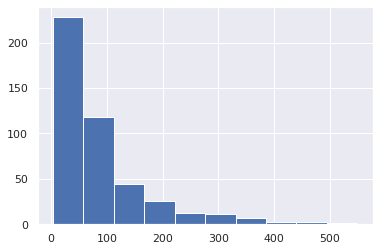

In [114]:
prius_df[(prius_df.final_price_date_flg !=0)].final_price_date.hist()

672
412
498000.0 550000.0
30.0 81.5


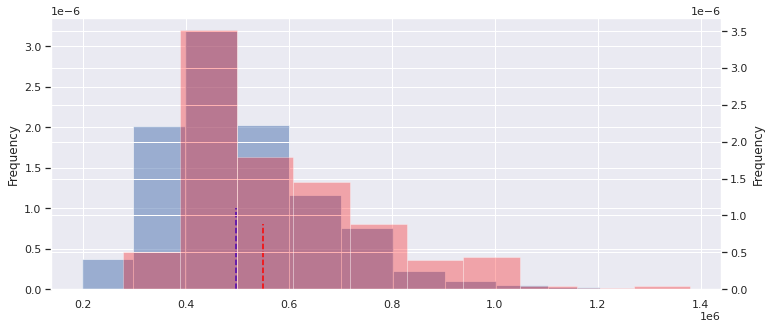

In [107]:
katashiki = 'zvw30_2009年'
pricemax = 3e6
min_distance = 0
max_distance = 100000

bins = 10
mask1 = (prius_df.distance !=-1)&(prius_df.distance>=min_distance) &(prius_df.distance<=max_distance) &(prius_df.max_price<pricemax) & (prius_df.diff_price.eq(0)) & (prius_df.katashiki == katashiki)
mask2 = (prius_df.distance !=-1)&(prius_df.distance>=min_distance) &(prius_df.distance<=max_distance) &(prius_df.max_price<pricemax) & (prius_df.diff_price.ne(0)) & (prius_df.katashiki == katashiki)
print(len(prius_df[mask1]))
print(len(prius_df[mask2]))

fig, axes = plt.subplots(1,1 ,figsize=(12, 5))
axes0 = axes.twinx()
prius_df[mask1].max_price.plot.hist(bins=bins, ax=axes, alpha=0.5,density=True)
median_1 = prius_df[mask1].max_price.median()
axes.vlines(median_1, ymin=0, ymax=1e-6, color='blue', linestyles='dashed')

prius_df[mask2].max_price.plot.hist(bins=bins, ax=axes0, alpha=0.3, color='red',density=True)
median_2 = prius_df[mask2].max_price.median()
axes.vlines(median_2, ymin=0, ymax=0.8e-6, color='red', linestyles='dashed')
print(median_1, median_2)
print(prius_df[mask1].keisai_day.median(), prius_df[mask2].keisai_day.median())

In [593]:
df[(df.final_price_date != 0) & (df.final_price_date > 0)].final_price_date.median()

(279, 14)

451
312
1798000.0 1852500.0


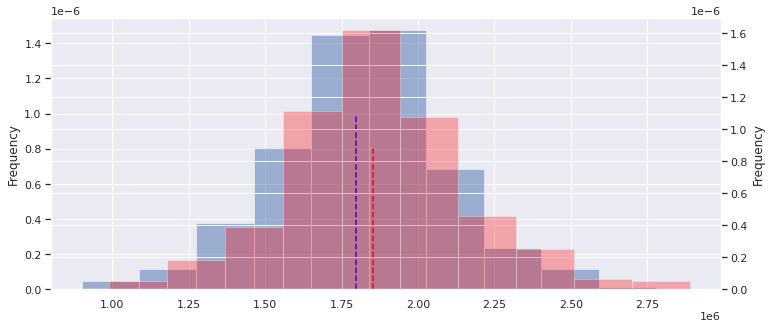

In [620]:
katashiki = 'zvw51_2016年'
pricemax = 3e6
min_distance = 0
max_distance = 50000

bins = 10
mask1 = (prius_df.distance !=-1)&(prius_df.distance>=min_distance) &(prius_df.distance<=max_distance) &(prius_df.max_price<pricemax) & (prius_df.diff_price.eq(0)) & (prius_df.katashiki == katashiki)
mask2 = (prius_df.distance !=-1)&(prius_df.distance>=min_distance) &(prius_df.distance<=max_distance) &(prius_df.max_price<pricemax) & (prius_df.diff_price.ne(0)) & (prius_df.katashiki == katashiki)
print(len(prius_df[mask1]))
print(len(prius_df[mask2]))

fig, axes = plt.subplots(1,1 ,figsize=(12, 5))
axes0 = axes.twinx()
prius_df[mask1].max_price.plot.hist(bins=bins, ax=axes, alpha=0.5,density=True)
median_1 = prius_df[mask1].max_price.median()
axes.vlines(median_1, ymin=0, ymax=1e-6, color='blue', linestyles='dashed')

prius_df[mask2].max_price.plot.hist(bins=bins, ax=axes0, alpha=0.3, color='red',density=True)
median_2 = prius_df[mask2].max_price.median()
axes.vlines(median_2, ymin=0, ymax=0.8e-6, color='red', linestyles='dashed')
print(median_1, median_2)

204
146
1579000.0 1639500.0


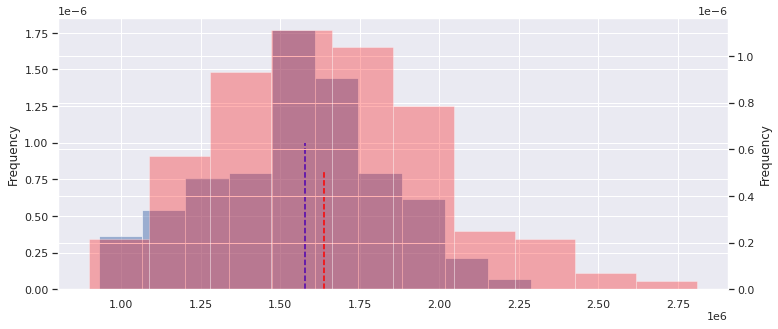

In [621]:
katashiki = 'zvw51_2016年'
pricemax = 3e6
min_distance = 50000
max_distance = 100000

bins = 10
mask1 = (prius_df.distance !=-1)&(prius_df.distance>=min_distance) &(prius_df.distance<=max_distance) &(prius_df.max_price<pricemax) & (prius_df.diff_price.eq(0)) & (prius_df.katashiki == katashiki)
mask2 = (prius_df.distance !=-1)&(prius_df.distance>=min_distance) &(prius_df.distance<=max_distance) &(prius_df.max_price<pricemax) & (prius_df.diff_price.ne(0)) & (prius_df.katashiki == katashiki)
print(len(prius_df[mask1]))
print(len(prius_df[mask2]))

fig, axes = plt.subplots(1,1 ,figsize=(12, 5))
axes0 = axes.twinx()
prius_df[mask1].max_price.plot.hist(bins=bins, ax=axes, alpha=0.5,density=True)
median_1 = prius_df[mask1].max_price.median()
axes.vlines(median_1, ymin=0, ymax=1e-6, color='blue', linestyles='dashed')

prius_df[mask2].max_price.plot.hist(bins=bins, ax=axes0, alpha=0.3, color='red',density=True)
median_2 = prius_df[mask2].max_price.median()
axes.vlines(median_2, ymin=0, ymax=0.8e-6, color='red', linestyles='dashed')
print(median_1, median_2)

40
16
1280000.0 1343500.0


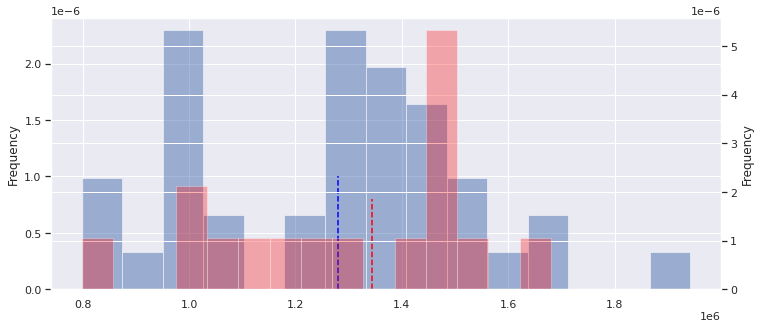

In [622]:
katashiki = 'zvw51_2016年'
pricemax = 1e7
min_distance = 100000
max_distance = 9999999

bins = 15
mask1 = (prius_df.distance !=-1)&(prius_df.distance>=min_distance) &(prius_df.distance<=max_distance) &(prius_df.max_price<pricemax) & (prius_df.diff_price.eq(0)) & (prius_df.katashiki == katashiki)
mask2 = (prius_df.distance !=-1)&(prius_df.distance>=min_distance) &(prius_df.distance<=max_distance) &(prius_df.max_price<pricemax) & (prius_df.diff_price.ne(0)) & (prius_df.katashiki == katashiki)
print(len(prius_df[mask1]))
print(len(prius_df[mask2]))

fig, axes = plt.subplots(1,1 ,figsize=(12, 5))
axes0 = axes.twinx()
prius_df[mask1].max_price.plot.hist(bins=bins, ax=axes, alpha=0.5,density=True)
median_1 = prius_df[mask1].max_price.median()
axes.vlines(median_1, ymin=0, ymax=1e-6, color='blue', linestyles='dashed')

prius_df[mask2].max_price.plot.hist(bins=bins, ax=axes0, alpha=0.3, color='red',density=True)
median_2 = prius_df[mask2].max_price.median()
axes.vlines(median_2, ymin=0, ymax=0.8e-6, color='red', linestyles='dashed')
print(median_1, median_2)

1454000.0 1498000.0


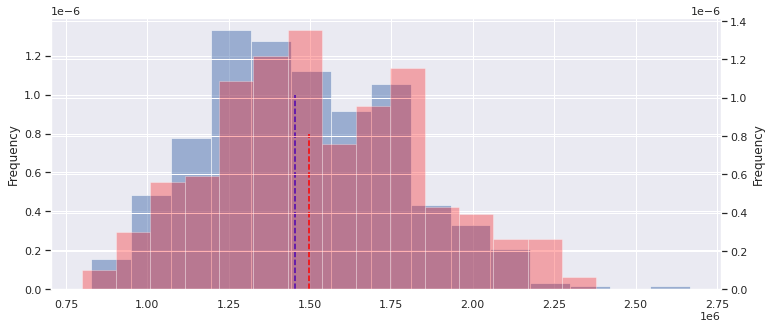

In [597]:
katashiki = 'zvw50_2016年'
pricemax = 1e7
min_distance = 50000
max_distance = 100000

bins = 15
mask1 = (prius_df.distance !=-1)&(prius_df.distance>=min_distance) &(prius_df.distance<=max_distance) &(prius_df.max_price<pricemax) & (prius_df.diff_price.eq(0)) & (prius_df.katashiki == katashiki)
mask2 = (prius_df.distance !=-1)&(prius_df.distance>=min_distance) &(prius_df.distance<=max_distance) &(prius_df.max_price<pricemax) & (prius_df.diff_price.ne(0)) & (prius_df.katashiki == katashiki)

fig, axes = plt.subplots(1,1 ,figsize=(12, 5))
axes0 = axes.twinx()
prius_df[mask1].max_price.plot.hist(bins=bins, ax=axes, alpha=0.5,density=True)
median_1 = prius_df[mask1].max_price.median()
axes.vlines(median_1, ymin=0, ymax=1e-6, color='blue', linestyles='dashed')

prius_df[mask2].max_price.plot.hist(bins=bins, ax=axes0, alpha=0.3, color='red',density=True)
median_2 = prius_df[mask2].max_price.median()
axes.vlines(median_2, ymin=0, ymax=0.8e-6, color='red', linestyles='dashed')
print(median_1, median_2)

In [ ]:
katashiki = 'zvw30_2010年'
pricemax = 1.5e6
distance = 5e4

fig, axes = plt.subplots(1,1 ,figsize=(12, 5))
axes0 = axes.twinx()
prius_df[(prius_df.distance !=-1) &(prius_df.distance<distance) &(prius_df.max_price<pricemax) & (prius_df.diff_price.eq(0)) & (prius_df.katashiki == katashiki)].max_price.plot.hist(bins=20, ax=axes, alpha=0.5,density=True)
median_1 = prius_df[(prius_df.distance !=-1) &(prius_df.distance<distance) &(prius_df.max_price<pricemax) &(prius_df.diff_price.eq(0)) & (prius_df.katashiki == katashiki)].max_price.median()
axes.vlines(median_1, ymin=0, ymax=1e-6, color='blue', linestyles='dashed')
prius_df[(prius_df.distance !=-1) &(prius_df.distance<distance) &(prius_df.max_price<pricemax) &(prius_df.diff_price.ne(0)) & (prius_df.katashiki == katashiki)].max_price.plot.hist(bins=20, ax=axes0, alpha=0.3, color='red',density=True)
median_2 = prius_df[(prius_df.distance !=-1) &(prius_df.distance<distance) &(prius_df.max_price<pricemax) &(prius_df.diff_price.ne(0)) & (prius_df.katashiki == katashiki)].max_price.median()
axes.vlines(median_2, ymin=0, ymax=0.8e-6, color='red', linestyles='dashed')
print(median_1, median_2)

In [555]:
katashiki = 'zvw30_2010年'
pricemax = 1.5e6
distance = 5e4

fig, axes = plt.subplots(1,1 ,figsize=(12, 5))
axes0 = axes.twinx()
prius_df[(prius_df.distance !=-1) &(prius_df.distance<distance) &(prius_df.max_price<pricemax) & (prius_df.diff_price.eq(0)) & (prius_df.katashiki == katashiki)].max_price.plot.hist(bins=20, ax=axes, alpha=0.5,density=True)
median_1 = prius_df[(prius_df.distance !=-1) &(prius_df.distance<distance) &(prius_df.max_price<pricemax) &(prius_df.diff_price.eq(0)) & (prius_df.katashiki == katashiki)].max_price.median()
axes.vlines(median_1, ymin=0, ymax=1e-6, color='blue', linestyles='dashed')
prius_df[(prius_df.distance !=-1) &(prius_df.distance<distance) &(prius_df.max_price<pricemax) &(prius_df.diff_price.ne(0)) & (prius_df.katashiki == katashiki)].max_price.plot.hist(bins=20, ax=axes0, alpha=0.3, color='red',density=True)
median_2 = prius_df[(prius_df.distance !=-1) &(prius_df.distance<distance) &(prius_df.max_price<pricemax) &(prius_df.diff_price.ne(0)) & (prius_df.katashiki == katashiki)].max_price.median()
axes.vlines(median_2, ymin=0, ymax=0.8e-6, color='red', linestyles='dashed')
print(median_1, median_2)

50000.0

450000.0 530000.0


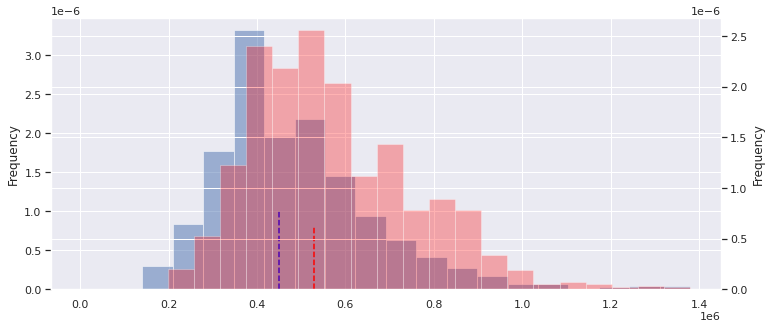

In [514]:
katashiki = 'zvw30_2010年'
pricemax = 1.5e6

fig, axes = plt.subplots(1,1 ,figsize=(12, 5))
axes0 = axes.twinx()
prius_df[(prius_df.max_price<pricemax) & (prius_df.diff_price.eq(0)) & (prius_df.katashiki == katashiki)].max_price.plot.hist(bins=20, ax=axes, alpha=0.5,density=True)
median_1 = prius_df[(prius_df.max_price<pricemax) &(prius_df.diff_price.eq(0)) & (prius_df.katashiki == katashiki)].max_price.median()
axes.vlines(median_1, ymin=0, ymax=1e-6, color='blue', linestyles='dashed')
prius_df[(prius_df.max_price<pricemax) &(prius_df.diff_price.ne(0)) & (prius_df.katashiki == katashiki)].max_price.plot.hist(bins=20, ax=axes0, alpha=0.3, color='red',density=True)
median_2 = prius_df[(prius_df.max_price<pricemax) &(prius_df.diff_price.ne(0)) & (prius_df.katashiki == katashiki)].max_price.median()
axes.vlines(median_2, ymin=0, ymax=0.8e-6, color='red', linestyles='dashed')
print(median_1, median_2)

1599000.0 1648500.0


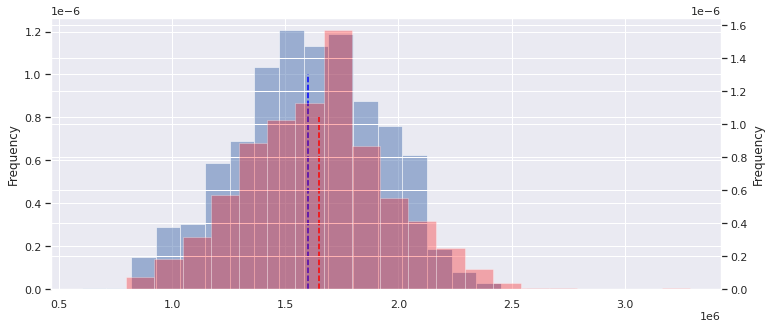

In [515]:
katashiki = 'zvw50_2016年'

pricemax = 4e6

fig, axes = plt.subplots(1,1 ,figsize=(12, 5))
axes0 = axes.twinx()
prius_df[(prius_df.max_price<pricemax) & (prius_df.diff_price.eq(0)) & (prius_df.katashiki == katashiki)].max_price.plot.hist(bins=20, ax=axes, alpha=0.5,density=True)
median_1 = prius_df[(prius_df.max_price<pricemax) &(prius_df.diff_price.eq(0)) & (prius_df.katashiki == katashiki)].max_price.median()
axes.vlines(median_1, ymin=0, ymax=1e-6, color='blue', linestyles='dashed')
prius_df[(prius_df.max_price<pricemax) &(prius_df.diff_price.ne(0)) & (prius_df.katashiki == katashiki)].max_price.plot.hist(bins=20, ax=axes0, alpha=0.3, color='red',density=True)
median_2 = prius_df[(prius_df.max_price<pricemax) &(prius_df.diff_price.ne(0)) & (prius_df.katashiki == katashiki)].max_price.median()
axes.vlines(median_2, ymin=0, ymax=0.8e-6, color='red', linestyles='dashed')
print(median_1, median_2)

430000.0 498000.0


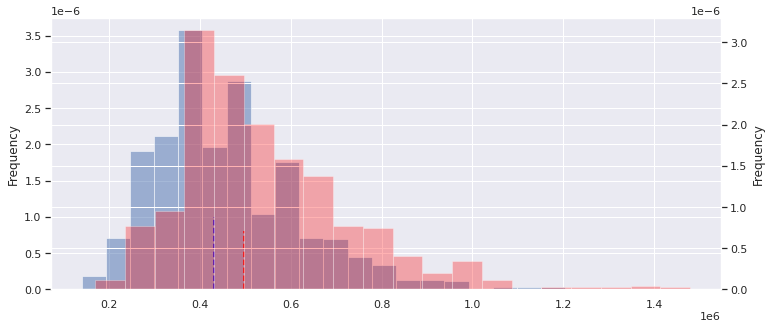

In [516]:
katashiki = 'zvw30_2009年'

pricemax = 4e6

fig, axes = plt.subplots(1,1 ,figsize=(12, 5))
axes0 = axes.twinx()
prius_df[(prius_df.max_price<pricemax) & (prius_df.diff_price.eq(0)) & (prius_df.katashiki == katashiki)].max_price.plot.hist(bins=20, ax=axes, alpha=0.5,density=True)
median_1 = prius_df[(prius_df.max_price<pricemax) &(prius_df.diff_price.eq(0)) & (prius_df.katashiki == katashiki)].max_price.median()
axes.vlines(median_1, ymin=0, ymax=1e-6, color='blue', linestyles='dashed')
prius_df[(prius_df.max_price<pricemax) &(prius_df.diff_price.ne(0)) & (prius_df.katashiki == katashiki)].max_price.plot.hist(bins=20, ax=axes0, alpha=0.3, color='red',density=True)
median_2 = prius_df[(prius_df.max_price<pricemax) &(prius_df.diff_price.ne(0)) & (prius_df.katashiki == katashiki)].max_price.median()
axes.vlines(median_2, ymin=0, ymax=0.8e-6, color='red', linestyles='dashed')
print(median_1, median_2)

542000.0 582000.0


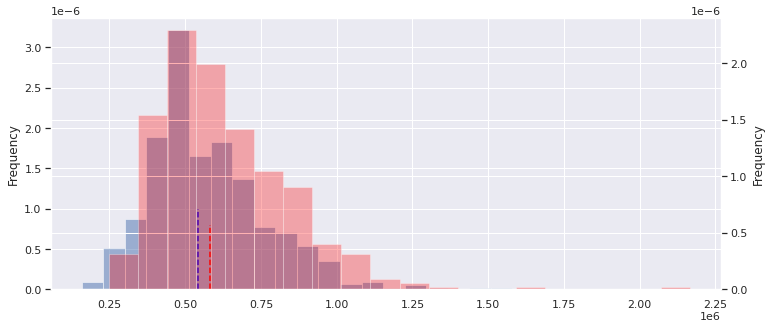

In [517]:

katashiki = 'zvw30_2011年'

pricemax = 4e6

fig, axes = plt.subplots(1,1 ,figsize=(12, 5))
axes0 = axes.twinx()
prius_df[(prius_df.max_price<pricemax) & (prius_df.diff_price.eq(0)) & (prius_df.katashiki == katashiki)].max_price.plot.hist(bins=20, ax=axes, alpha=0.5,density=True)
median_1 = prius_df[(prius_df.max_price<pricemax) &(prius_df.diff_price.eq(0)) & (prius_df.katashiki == katashiki)].max_price.median()
axes.vlines(median_1, ymin=0, ymax=1e-6, color='blue', linestyles='dashed')
prius_df[(prius_df.max_price<pricemax) &(prius_df.diff_price.ne(0)) & (prius_df.katashiki == katashiki)].max_price.plot.hist(bins=20, ax=axes0, alpha=0.3, color='red',density=True)
median_2 = prius_df[(prius_df.max_price<pricemax) &(prius_df.diff_price.ne(0)) & (prius_df.katashiki == katashiki)].max_price.median()
axes.vlines(median_2, ymin=0, ymax=0.8e-6, color='red', linestyles='dashed')
print(median_1, median_2)

1720000.0 1790000.0


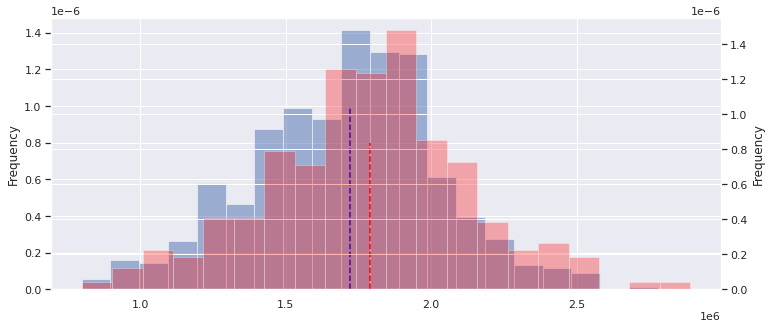

In [518]:

katashiki = 'zvw51_2016年'

pricemax = 4e6

fig, axes = plt.subplots(1,1 ,figsize=(12, 5))
axes0 = axes.twinx()
prius_df[(prius_df.max_price<pricemax) & (prius_df.diff_price.eq(0)) & (prius_df.katashiki == katashiki)].max_price.plot.hist(bins=20, ax=axes, alpha=0.5,density=True)
median_1 = prius_df[(prius_df.max_price<pricemax) &(prius_df.diff_price.eq(0)) & (prius_df.katashiki == katashiki)].max_price.median()
axes.vlines(median_1, ymin=0, ymax=1e-6, color='blue', linestyles='dashed')
prius_df[(prius_df.max_price<pricemax) &(prius_df.diff_price.ne(0)) & (prius_df.katashiki == katashiki)].max_price.plot.hist(bins=20, ax=axes0, alpha=0.3, color='red',density=True)
median_2 = prius_df[(prius_df.max_price<pricemax) &(prius_df.diff_price.ne(0)) & (prius_df.katashiki == katashiki)].max_price.median()
axes.vlines(median_2, ymin=0, ymax=0.8e-6, color='red', linestyles='dashed')
print(median_1, median_2)

2290000.0 2330000.0


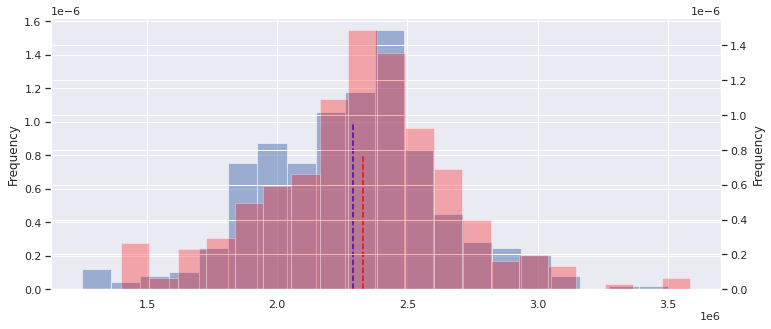

In [519]:

katashiki = 'zvw51_2019年'
pricemax = 4e6

fig, axes = plt.subplots(1,1 ,figsize=(12, 5))
axes0 = axes.twinx()
prius_df[(prius_df.max_price<pricemax) & (prius_df.diff_price.eq(0)) & (prius_df.katashiki == katashiki)].max_price.plot.hist(bins=20, ax=axes, alpha=0.5,density=True)
median_1 = prius_df[(prius_df.max_price<pricemax) &(prius_df.diff_price.eq(0)) & (prius_df.katashiki == katashiki)].max_price.median()
axes.vlines(median_1, ymin=0, ymax=1e-6, color='blue', linestyles='dashed')
prius_df[(prius_df.max_price<pricemax) &(prius_df.diff_price.ne(0)) & (prius_df.katashiki == katashiki)].max_price.plot.hist(bins=20, ax=axes0, alpha=0.3, color='red',density=True)
median_2 = prius_df[(prius_df.max_price<pricemax) &(prius_df.diff_price.ne(0)) & (prius_df.katashiki == katashiki)].max_price.median()
axes.vlines(median_2, ymin=0, ymax=0.8e-6, color='red', linestyles='dashed')
print(median_1, median_2)

1700000.0 1718000.0


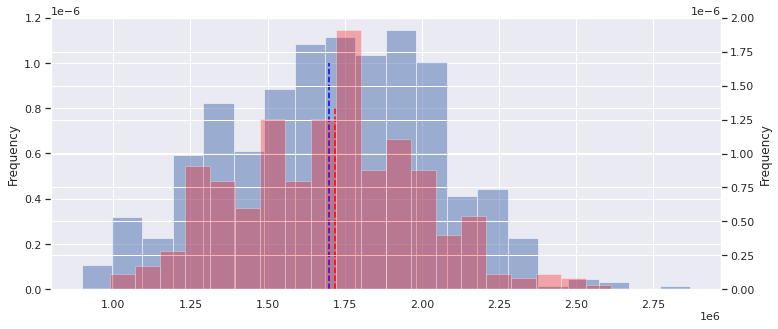

In [520]:

katashiki = 'zvw50_2017年'
pricemax = 4e6

fig, axes = plt.subplots(1,1 ,figsize=(12, 5))
axes0 = axes.twinx()
prius_df[(prius_df.max_price<pricemax) & (prius_df.diff_price.eq(0)) & (prius_df.katashiki == katashiki)].max_price.plot.hist(bins=20, ax=axes, alpha=0.5,density=True)
median_1 = prius_df[(prius_df.max_price<pricemax) &(prius_df.diff_price.eq(0)) & (prius_df.katashiki == katashiki)].max_price.median()
axes.vlines(median_1, ymin=0, ymax=1e-6, color='blue', linestyles='dashed')
prius_df[(prius_df.max_price<pricemax) &(prius_df.diff_price.ne(0)) & (prius_df.katashiki == katashiki)].max_price.plot.hist(bins=20, ax=axes0, alpha=0.3, color='red',density=True)
median_2 = prius_df[(prius_df.max_price<pricemax) &(prius_df.diff_price.ne(0)) & (prius_df.katashiki == katashiki)].max_price.median()
axes.vlines(median_2, ymin=0, ymax=0.8e-6, color='red', linestyles='dashed')
print(median_1, median_2)

In [ ]:

katashiki = 'zvw50_2017年'
pricemax = 4e6

fig, axes = plt.subplots(1,1 ,figsize=(12, 5))
axes0 = axes.twinx()
prius_df[(prius_df.max_price<pricemax) & (prius_df.diff_price.eq(0)) & (prius_df.katashiki == katashiki)].max_price.plot.hist(bins=20, ax=axes, alpha=0.5,density=True)
median_1 = prius_df[(prius_df.max_price<pricemax) &(prius_df.diff_price.eq(0)) & (prius_df.katashiki == katashiki)].max_price.median()
axes.vlines(median_1, ymin=0, ymax=1e-6, color='blue', linestyles='dashed')
prius_df[(prius_df.max_price<pricemax) &(prius_df.diff_price.ne(0)) & (prius_df.katashiki == katashiki)].max_price.plot.hist(bins=20, ax=axes0, alpha=0.3, color='red',density=True)
median_2 = prius_df[(prius_df.max_price<pricemax) &(prius_df.diff_price.ne(0)) & (prius_df.katashiki == katashiki)].max_price.median()
axes.vlines(median_2, ymin=0, ymax=0.8e-6, color='red', linestyles='dashed')
print(median_1, median_2)

728000.0 828500.0


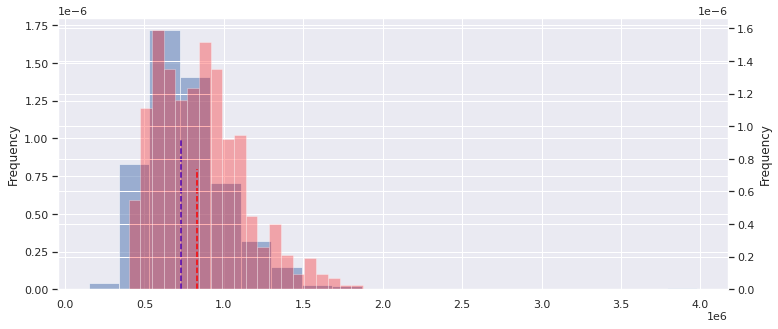

In [521]:

katashiki = 'zvw30_2012年'
pricemax = 4e6

fig, axes = plt.subplots(1,1 ,figsize=(12, 5))
axes0 = axes.twinx()
prius_df[(prius_df.max_price<pricemax) & (prius_df.diff_price.eq(0)) & (prius_df.katashiki == katashiki)].max_price.plot.hist(bins=20, ax=axes, alpha=0.5,density=True)
median_1 = prius_df[(prius_df.max_price<pricemax) &(prius_df.diff_price.eq(0)) & (prius_df.katashiki == katashiki)].max_price.median()
axes.vlines(median_1, ymin=0, ymax=1e-6, color='blue', linestyles='dashed')
prius_df[(prius_df.max_price<pricemax) &(prius_df.diff_price.ne(0)) & (prius_df.katashiki == katashiki)].max_price.plot.hist(bins=20, ax=axes0, alpha=0.3, color='red',density=True)
median_2 = prius_df[(prius_df.max_price<pricemax) &(prius_df.diff_price.ne(0)) & (prius_df.katashiki == katashiki)].max_price.median()
axes.vlines(median_2, ymin=0, ymax=0.8e-6, color='red', linestyles='dashed')
print(median_1, median_2)

822500.0 897000.0


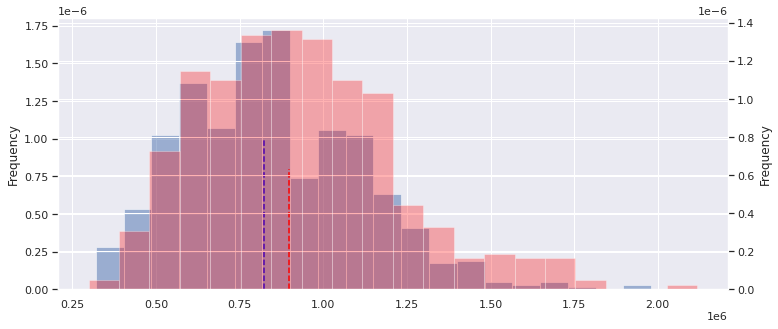

In [522]:

katashiki = 'zvw30_2013年'
pricemax = 4e6

fig, axes = plt.subplots(1,1 ,figsize=(12, 5))
axes0 = axes.twinx()
prius_df[(prius_df.max_price<pricemax) & (prius_df.diff_price.eq(0)) & (prius_df.katashiki == katashiki)].max_price.plot.hist(bins=20, ax=axes, alpha=0.5,density=True)
median_1 = prius_df[(prius_df.max_price<pricemax) &(prius_df.diff_price.eq(0)) & (prius_df.katashiki == katashiki)].max_price.median()
axes.vlines(median_1, ymin=0, ymax=1e-6, color='blue', linestyles='dashed')
prius_df[(prius_df.max_price<pricemax) &(prius_df.diff_price.ne(0)) & (prius_df.katashiki == katashiki)].max_price.plot.hist(bins=20, ax=axes0, alpha=0.3, color='red',density=True)
median_2 = prius_df[(prius_df.max_price<pricemax) &(prius_df.diff_price.ne(0)) & (prius_df.katashiki == katashiki)].max_price.median()
axes.vlines(median_2, ymin=0, ymax=0.8e-6, color='red', linestyles='dashed')
print(median_1, median_2)

590000.0 680000.0


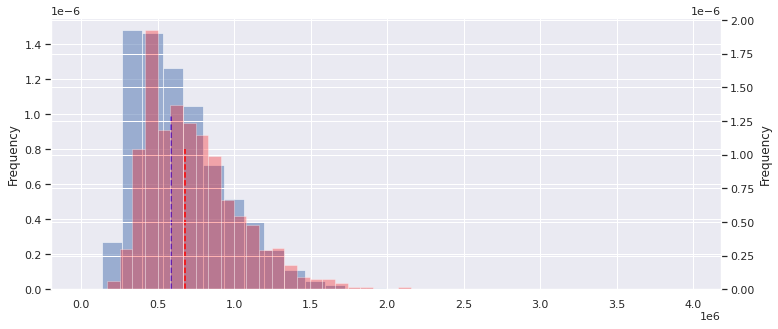

In [411]:
n=0
katashiki = 'zvw30'

fig, axes = plt.subplots(1,1 ,figsize=(12, 5))
axes0 = axes.twinx()
prius_df[(prius_df.diff_price.eq(0)) & (prius_df.katashiki == katashiki)].max_price.plot.hist(bins=30, ax=axes, alpha=0.5,density=True)
median_1 = prius_df[(prius_df.diff_price.eq(0)) & (prius_df.katashiki == katashiki)].max_price.median()
axes.vlines(median_1, ymin=0, ymax=1e-6, color='blue', linestyles='dashed')
prius_df[(prius_df.diff_price.ne(0)) & (prius_df.katashiki == katashiki)].max_price.plot.hist(bins=30, ax=axes0, alpha=0.3, color='red',density=True)
median_2 = prius_df[(prius_df.diff_price.ne(0)) & (prius_df.katashiki == katashiki)].max_price.median()
axes.vlines(median_2, ymin=0, ymax=0.8e-6, color='red', linestyles='dashed')
print(median_1, median_2)

1690000.0 1694000.0


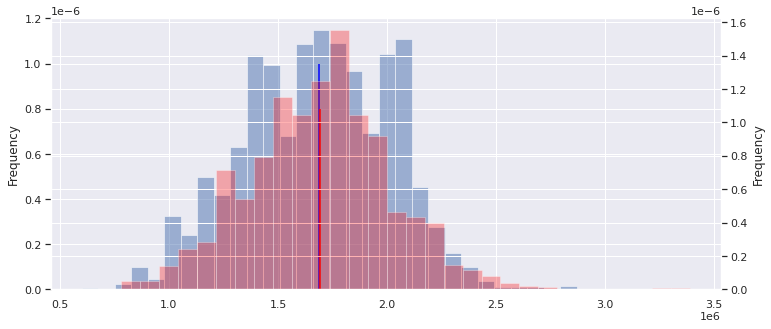

In [428]:
n=0
katashiki = 'zvw50'

fig, axes = plt.subplots(1,1 ,figsize=(12, 5))
axes0 = axes.twinx()
prius_df[(prius_df.diff_price.eq(0)) & (prius_df.katashiki == katashiki) & (prius_df.max_price < 0.8e7)].max_price.plot.hist(bins=30, ax=axes, alpha=0.5,density=True)
median_1 = prius_df[(prius_df.diff_price.eq(0)) & (prius_df.katashiki == katashiki) & (prius_df.max_price < 0.8e7)].max_price.median()
axes.vlines(median_1, ymin=0, ymax=1e-6, color='blue')
prius_df[(prius_df.diff_price.ne(0)) & (prius_df.katashiki == katashiki) & (prius_df.max_price < 0.8e7)].max_price.plot.hist(bins=30, ax=axes0, alpha=0.3, color='red',density=True)
median_2 = prius_df[(prius_df.diff_price.ne(0)) & (prius_df.katashiki == katashiki) & (prius_df.max_price < 0.8e7)].max_price.median()
axes.vlines(median_2, ymin=0, ymax=0.8e-6, color='red')
print(median_1, median_2)

In [437]:
prius_df[(prius_df.diff_price.eq(0)) & (prius_df.katashiki == katashiki)]

,date,stock_id,price,end_day,start_day,min_price,max_price,diff_price,car_name,grade_id,n_p_grade_id,keisai_day,katashiki
286,2021-05-24,0126053A30210521W002,270000,2021-06-19,2021-05-24,270000,270000,0,プリウス,26.0,26,26.0,nhw20
328,2020-05-23,0200139A30200523W001,196000,2020-05-30,2020-05-23,196000,196000,0,プリウス,26.0,26,7.0,nhw20
352,2020-10-10,0200286A20201010G002,488000,2020-10-17,2020-10-10,488000,488000,0,プリウス,10.0,10,7.0,nhw20
358,2020-03-19,0200331A30200319W002,358000,2020-04-10,2020-03-19,358000,358000,0,プリウス,39.0,39,22.0,nhw20
359,2020-05-29,0200342A30200529W002,250000,2020-09-25,2020-05-29,250000,250000,0,プリウス,37.0,37,119.0,nhw20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19513,2021-02-04,9572194A30210127W002,298000,2021-02-12,2021-02-04,298000,298000,0,プリウス,26.0,26,8.0,nhw20
19520,2021-12-05,9572574A30211203W002,198000,2021-12-15,2021-12-05,198000,198000,0,プリウス,10.0,10,10.0,nhw20
19544,2021-06-19,9800169A30210619W001,400000,2021-09-26,2021-06-19,400000,400000,0,プリウス,39.0,39,99.0,nhw20
19545,2021-10-17,9800169A30211017W001,400000,2021-12-11,2021-10-17,400000,400000,0,プリウス,37.0,37,55.0,nhw20


2090000.0 1980000.0


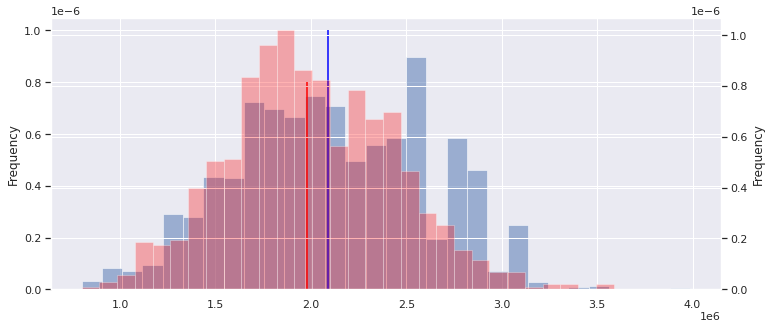

In [406]:
n=0
katashiki = 'zvw51'

fig, axes = plt.subplots(1,1 ,figsize=(12, 5))
axes0 = axes.twinx()
prius_df[(prius_df.diff_price.eq(0)) & (prius_df.katashiki == katashiki)].max_price.plot.hist(bins=30, ax=axes, alpha=0.5,density=True)
median_1 = prius_df[(prius_df.diff_price.eq(0)) & (prius_df.katashiki == katashiki)].max_price.median()
axes.vlines(median_1, ymin=0, ymax=1e-6, color='blue')
prius_df[(prius_df.diff_price.ne(0)) & (prius_df.katashiki == katashiki)].max_price.plot.hist(bins=30, ax=axes0, alpha=0.3, color='red',density=True)
median_2 = prius_df[(prius_df.diff_price.ne(0)) & (prius_df.katashiki == katashiki)].max_price.median()
axes.vlines(median_2, ymin=0, ymax=0.8e-6, color='red')
print(median_1, median_2)

1799000.0 1859000.0


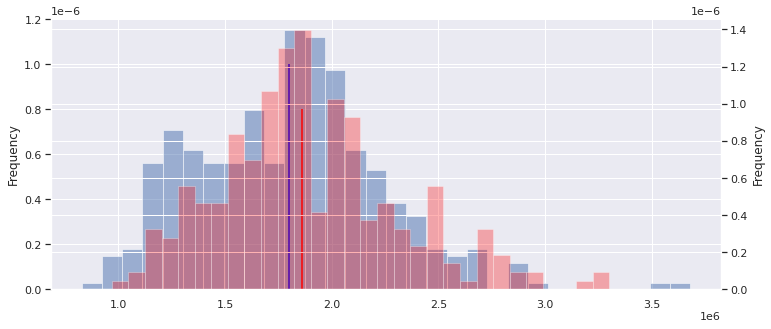

In [427]:
katashiki = 'zvw55'

fig, axes = plt.subplots(1,1 ,figsize=(12, 5))
axes0 = axes.twinx()
prius_df[(prius_df.diff_price.eq(0)) & (prius_df.katashiki == katashiki)].max_price.plot.hist(bins=30, ax=axes, alpha=0.5,density=True)
median_1 = prius_df[(prius_df.diff_price.eq(0)) & (prius_df.katashiki == katashiki)].max_price.median()
axes.vlines(median_1, ymin=0, ymax=1e-6, color='blue')
prius_df[(prius_df.diff_price.ne(0)) & (prius_df.katashiki == katashiki)].max_price.plot.hist(bins=30, ax=axes0, alpha=0.3, color='red',density=True)
median_2 = prius_df[(prius_df.diff_price.ne(0)) & (prius_df.katashiki == katashiki)].max_price.median()
axes.vlines(median_2, ymin=0, ymax=0.8e-6, color='red')
print(median_1, median_2)

In [431]:
prius_df[(prius_df.diff_price.eq(0)) & (prius_df.katashiki == 'nhw20')& (prius_df.max_price < 2.0e6)].shape

(378, 13)

290000.0 320000.0


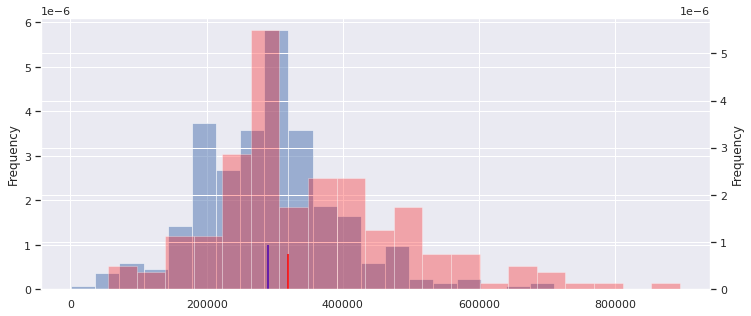

In [432]:

katashiki = 'nhw20'

fig, axes = plt.subplots(1,1 ,figsize=(12, 5))
axes0 = axes.twinx()
prius_df[(prius_df.diff_price.eq(0)) & (prius_df.katashiki == katashiki)& (prius_df.max_price < 2.0e6)].max_price.plot.hist(bins=20, ax=axes, alpha=0.5,density=True)
median_1 = prius_df[(prius_df.diff_price.eq(0)) & (prius_df.katashiki == katashiki)& (prius_df.max_price < 2.0e6)].max_price.median()
axes.vlines(median_1, ymin=0, ymax=1e-6, color='blue')
prius_df[(prius_df.diff_price.ne(0)) & (prius_df.katashiki == katashiki)& (prius_df.max_price < 2.0e6)].max_price.plot.hist(bins=20, ax=axes0, alpha=0.3, color='red',density=True)
median_2 = prius_df[(prius_df.diff_price.ne(0)) & (prius_df.katashiki == katashiki)& (prius_df.max_price < 2.0e6)].max_price.median()
axes.vlines(median_2, ymin=0, ymax=0.8e-6, color='red')
print(median_1, median_2)

698000.0 820000.0


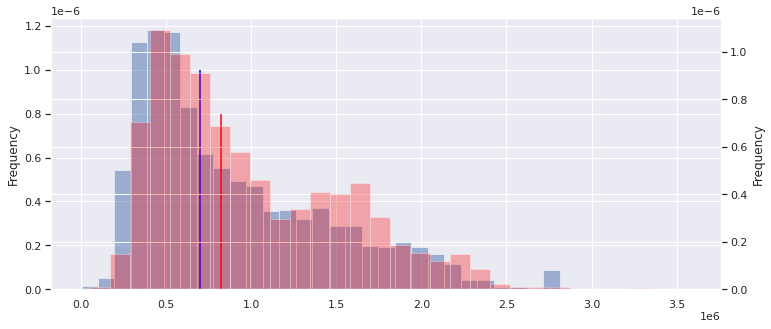

In [185]:
grade_id=26

fig, axes = plt.subplots(1,1 ,figsize=(12, 5))
axes0 = axes.twinx()
prius_df[(prius_df.diff_price.eq(0)) & (prius_df.n_p_grade_id == grade_id)].max_price.plot.hist(bins=30, ax=axes, alpha=0.5,density=True)
median_1 = prius_df[(prius_df.diff_price.eq(0)) & (prius_df.n_p_grade_id == grade_id)].max_price.median()
axes.vlines(median_1, ymin=0, ymax=1e-6, color='blue')
prius_df[(prius_df.diff_price.ne(0)) & (prius_df.n_p_grade_id == grade_id)].max_price.plot.hist(bins=30, ax=axes0, alpha=0.3, color='red',density=True)
median_2 = prius_df[(prius_df.diff_price.ne(0)) & (prius_df.n_p_grade_id == grade_id)].max_price.median()
axes.vlines(median_2, ymin=0, ymax=0.8e-6, color='red')
print(median_1, median_2)

In [186]:
prius_df[(prius_df.diff_price.ne(0)) & (prius_df.n_p_grade_id == grade_id)]

,date,stock_id,price,end_day,start_day,min_price,max_price,diff_price,car_name,grade_id,n_p_grade_id
30,2020-01-04,0103405A30200104W002,1780000,2020-08-04,2020-01-04,1480000,1780000,300000,プリウス,26.0,26
34,2020-05-13,0103405A30200512W001,1480000,2020-06-10,2020-05-13,1380000,1480000,100000,プリウス,26.0,26
49,2020-05-22,0120004A30200514W001,1100000,2020-11-30,2020-05-22,1045000,1100000,55000,プリウス,26.0,26
52,2020-08-21,0120010A30200820W005,718000,2021-07-18,2020-08-21,508000,718000,210000,プリウス,26.0,26
55,2020-07-11,0120025A30200711W003,1349000,2020-10-25,2020-07-11,1349000,1399000,50000,プリウス,26.0,26
...,...,...,...,...,...,...,...,...,...,...,...
19535,2021-04-09,9731162A30210408W001,780000,2021-07-01,2021-04-09,580000,980000,400000,プリウス,26.0,26
19548,2021-09-04,9800388A20210904Q001,599000,2021-10-19,2021-09-04,399000,599000,200000,プリウス,26.0,26
19554,2020-06-20,9800389A30200620W001,1180000,2020-10-26,2020-06-20,950000,1180000,230000,プリウス,26.0,26
19555,2020-10-15,9800389A30201015W001,650000,2021-12-23,2020-10-15,520000,650000,130000,プリウス,26.0,26


1398000.0 1199000.0


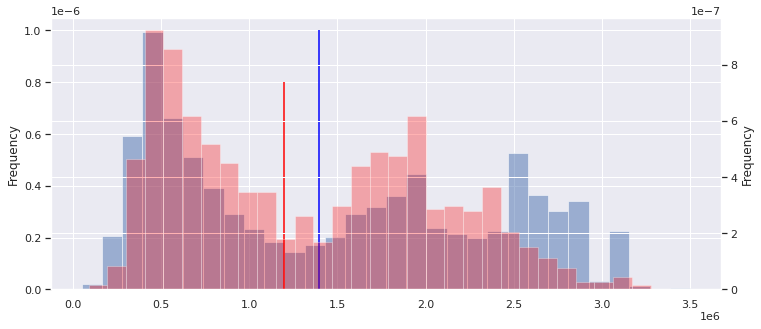

In [165]:
grade_id=37

fig, axes = plt.subplots(1,1 ,figsize=(12, 5))
axes0 = axes.twinx()
prius_df[(prius_df.max_price <= 4e6) & (prius_df.diff_price.eq(0)) & (prius_df.n_p_grade_id == grade_id)].max_price.plot.hist(bins=30, ax=axes, alpha=0.5,density=True)
median_1 = prius_df[(prius_df.diff_price.eq(0)) & (prius_df.n_p_grade_id == grade_id)].max_price.median()
axes.vlines(median_1, ymin=0, ymax=1e-6, color='blue')
prius_df[(prius_df.max_price <= 4e6) & (prius_df.diff_price.ne(0)) & (prius_df.n_p_grade_id == grade_id)].max_price.plot.hist(bins=30, ax=axes0, alpha=0.3, color='red',density=True)
median_2 = prius_df[(prius_df.diff_price.ne(0)) & (prius_df.n_p_grade_id == grade_id)].max_price.median()
axes.vlines(median_2, ymin=0, ymax=0.8e-6, color='red')
print(median_1, median_2)

In [188]:
prius_df[(prius_df.diff_price.ne(0)) & (prius_df.n_p_grade_id == grade_id)].diff_price.median()

100000.0

In [198]:
prius_df[(prius_df.diff_price.ne(0)) & (prius_df.n_p_grade_id == grade_id)].keisai_day.median(),\
prius_df[(prius_df.diff_price.eq(0)) & (prius_df.n_p_grade_id == grade_id)].keisai_day.median(), 

(79.0, 30.0)

In [ ]:
prius_df[(prius_df.diff_price.ne(0)) & (prius_df.n_p_grade_id == grade_id)]\
, prius_df[(prius_df.diff_price.ne(0)) & (prius_df.n_p_grade_id == grade_id)]

In [344]:
prius_katashiki

,stock_id,katashiki_re,stock_id_counts
24,0302482A30201020W007,NHW10,1
25,1001867A30210512W001,NHW10,1
26,0508150A20200317J002,NHW10,1
27,0507248A20211221J004,NHW10,1
28,0208073A30200209W002,NHW10,1
...,...,...,...
141972,0701954A30200601W006,ZVW51,1
141973,0101299A30200305W001,ZVW30,1
141974,0101299A30200524W001,ZVW50,1
141975,0101299A30191101W001,ZVW50,1


623500.0 710000.0


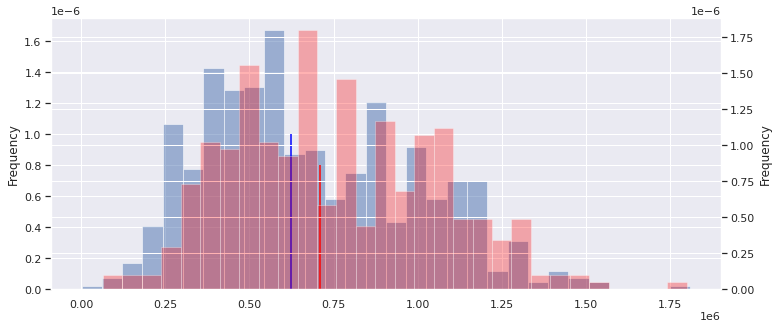

In [199]:
grade_id=39

fig, axes = plt.subplots(1,1 ,figsize=(12, 5))
axes0 = axes.twinx()
prius_df[(prius_df.max_price <= 4e6) & (prius_df.diff_price.eq(0)) & (prius_df.n_p_grade_id == grade_id)].max_price.plot.hist(bins=30, ax=axes, alpha=0.5,density=True)
median_1 = prius_df[(prius_df.diff_price.eq(0)) & (prius_df.n_p_grade_id == grade_id)].max_price.median()
axes.vlines(median_1, ymin=0, ymax=1e-6, color='blue')
prius_df[(prius_df.max_price <= 4e6) & (prius_df.diff_price.ne(0)) & (prius_df.n_p_grade_id == grade_id)].max_price.plot.hist(bins=30, ax=axes0, alpha=0.3, color='red',density=True)
median_2 = prius_df[(prius_df.diff_price.ne(0)) & (prius_df.n_p_grade_id == grade_id)].max_price.median()
axes.vlines(median_2, ymin=0, ymax=0.8e-6, color='red')
print(median_1, median_2)

In [200]:
prius_df[(prius_df.diff_price.ne(0)) & (prius_df.n_p_grade_id == grade_id)].keisai_day.median(),\
prius_df[(prius_df.diff_price.eq(0)) & (prius_df.n_p_grade_id == grade_id)].keisai_day.median(), 

(79.5, 29.0)

480000.0 580000.0


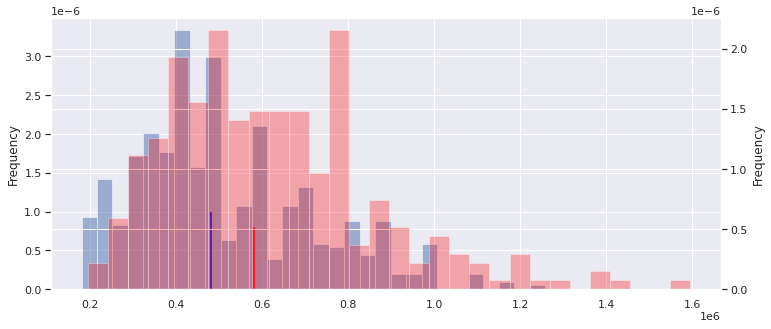

In [201]:
grade_id=24

fig, axes = plt.subplots(1,1 ,figsize=(12, 5))
axes0 = axes.twinx()
prius_df[(prius_df.max_price <= 4e6) & (prius_df.diff_price.eq(0)) & (prius_df.n_p_grade_id == grade_id)].max_price.plot.hist(bins=30, ax=axes, alpha=0.5,density=True)
median_1 = prius_df[(prius_df.diff_price.eq(0)) & (prius_df.n_p_grade_id == grade_id)].max_price.median()
axes.vlines(median_1, ymin=0, ymax=1e-6, color='blue')
prius_df[(prius_df.max_price <= 4e6) & (prius_df.diff_price.ne(0)) & (prius_df.n_p_grade_id == grade_id)].max_price.plot.hist(bins=30, ax=axes0, alpha=0.3, color='red',density=True)
median_2 = prius_df[(prius_df.diff_price.ne(0)) & (prius_df.n_p_grade_id == grade_id)].max_price.median()
axes.vlines(median_2, ymin=0, ymax=0.8e-6, color='red')
print(median_1, median_2)

In [202]:
prius_df[(prius_df.diff_price.ne(0)) & (prius_df.n_p_grade_id == grade_id)].keisai_day.median(),\
prius_df[(prius_df.diff_price.eq(0)) & (prius_df.n_p_grade_id == grade_id)].keisai_day.median(), 

(72.0, 33.0)

1950000.0 1980500.0


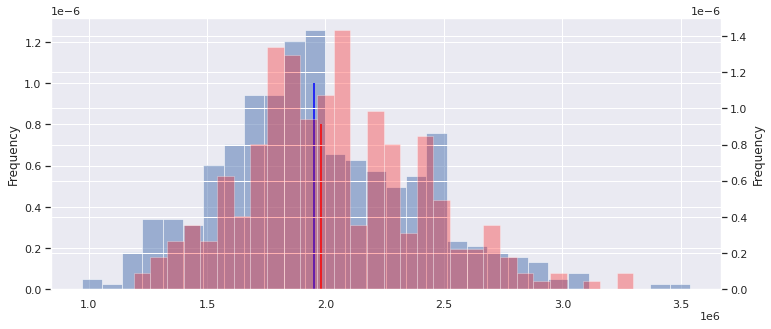

In [169]:
grade_id=56

fig, axes = plt.subplots(1,1 ,figsize=(12, 5))
axes0 = axes.twinx()
prius_df[(prius_df.max_price <= 4e6) & (prius_df.diff_price.eq(0)) & (prius_df.n_p_grade_id == grade_id)].max_price.plot.hist(bins=30, ax=axes, alpha=0.5,density=True)
median_1 = prius_df[(prius_df.diff_price.eq(0)) & (prius_df.n_p_grade_id == grade_id)].max_price.median()
axes.vlines(median_1, ymin=0, ymax=1e-6, color='blue')
prius_df[(prius_df.max_price <= 4e6) & (prius_df.diff_price.ne(0)) & (prius_df.n_p_grade_id == grade_id)].max_price.plot.hist(bins=30, ax=axes0, alpha=0.3, color='red',density=True)
median_2 = prius_df[(prius_df.diff_price.ne(0)) & (prius_df.n_p_grade_id == grade_id)].max_price.median()
axes.vlines(median_2, ymin=0, ymax=0.8e-6, color='red')
print(median_1, median_2)

In [ ]:
prius_df[(prius_df.diff_price.ne(0)) & (prius_df.n_p_grade_id == grade_id)].keisai_day.median(),\
prius_df[(prius_df.diff_price.eq(0)) & (prius_df.n_p_grade_id == grade_id)].keisai_day.median(), 

1820000.0 1798000.0


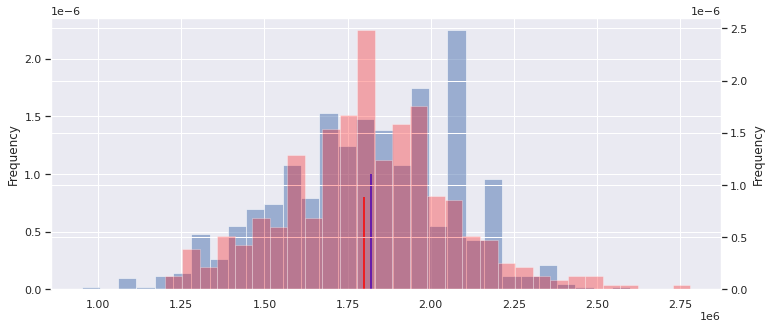

In [166]:
grade_id=69

fig, axes = plt.subplots(1,1 ,figsize=(12, 5))
axes0 = axes.twinx()
prius_df[(prius_df.max_price <= 4e6) & (prius_df.diff_price.eq(0)) & (prius_df.n_p_grade_id == grade_id)].max_price.plot.hist(bins=30, ax=axes, alpha=0.5,density=True)
median_1 = prius_df[(prius_df.diff_price.eq(0)) & (prius_df.n_p_grade_id == grade_id)].max_price.median()
axes.vlines(median_1, ymin=0, ymax=1e-6, color='blue')
prius_df[(prius_df.max_price <= 4e6) & (prius_df.diff_price.ne(0)) & (prius_df.n_p_grade_id == grade_id)].max_price.plot.hist(bins=30, ax=axes0, alpha=0.3, color='red',density=True)
median_2 = prius_df[(prius_df.diff_price.ne(0)) & (prius_df.n_p_grade_id == grade_id)].max_price.median()
axes.vlines(median_2, ymin=0, ymax=0.8e-6, color='red')
print(median_1, median_2)

698000.0 820000.0


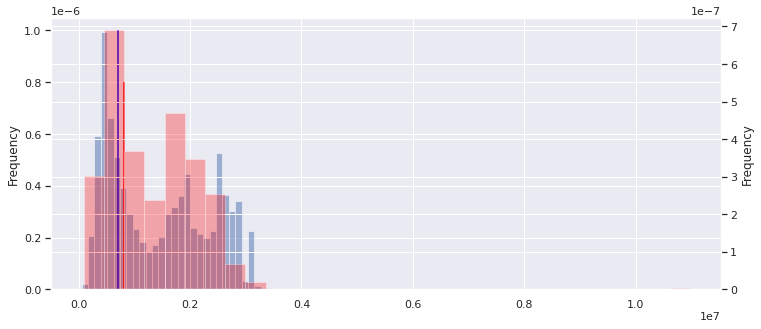

In [161]:
grade_id=37

fig, axes = plt.subplots(1,1 ,figsize=(12, 5))
axes0 = axes.twinx()
prius_df[(prius_df.diff_price.eq(0)) & (prius_df.n_p_grade_id == grade_id)].max_price.plot.hist(bins=30, ax=axes, alpha=0.5,density=True)
median_1 = prius_df[(prius_df.diff_price.eq(0)) & (prius_df.n_p_grade_id == 26)].max_price.median()
axes.vlines(median_1, ymin=0, ymax=1e-6, color='blue')
prius_df[(prius_df.diff_price.ne(0)) & (prius_df.n_p_grade_id == grade_id)].max_price.plot.hist(bins=30, ax=axes0, alpha=0.3, color='red',density=True)
median_2 = prius_df[(prius_df.diff_price.ne(0)) & (prius_df.n_p_grade_id == 26)].max_price.median()
axes.vlines(median_2, ymin=0, ymax=0.8e-6, color='red')
print(median_1, median_2)

In [137]:
prius_df[prius_df.n_p_grade_id == 26].max_price.median()

760000.0

In [138]:
prius_df[prius_df.n_p_grade_id == 37].max_price.median()

1299000.0

In [131]:
prius_df.stock_id.nunique()

19526

In [73]:
prius[prius.stock_id.isin(prius[prius.duplicated()].stock_id.unique())].drop_duplicates().sort_values(by='stock_id', ascending=False)

,stock_id,n_p_grade_id
140122,9940003A30200201W001,56
57206,9940001A30200214W004,50
36077,9940001A20210123Q005,27
46357,9940001A20201027Q001,37
138767,9900074A30190620W001,53
...,...,...
22350,0100252A30200420W007,26
80528,0100252A30190705W002,26
97473,0100155A20200430E001,37
12309,0100101A20200815E002,26


In [ ]:
19526

In [27]:
df[df.stock_id.isin(prius.stock_id.unique())].stock_id.nunique()

19526

In [29]:
prius

,stock_id,n_p_car_nm_n,katashiki,n_p_grade_id,n_p_grade_nm_n
0,9510371A30200423W002,プリウス,-,-1,None
1,9510371A30200116W002,プリウス,-,10,プライム プライム逆輸入 左ハンドル ２０２０モデル
2,9510371A30200423W002,プリウス,-,-1,プリウスプライム ２０２０ Ａｐｐｌｅ ｃａｒｐｌａｙ
3,9510371A30200116W002,プリウス,-,10,プライム 逆輸入 左ハンドル Ａｐｐｌｅ ｃａｒｐｌａｙ
4,0561494A30210616W001,プリウス,DAA,26,Ｓ
...,...,...,...,...,...
141972,0701954A30200601W006,プリウス,ZVW51 純正ＳＤナビ,56,Ａツーリングセレクション メーカーナビ フルセグ ＬＥＤ
141973,0101299A30200305W001,プリウス,ZVW30-ＡＨＸＥＢ－Ｔ,37,Ｓツーリング 純正ナビ ＥＴＣ バックカメラ ＬＥＤライト
141974,0101299A30200524W001,プリウス,ZVW50-ＡＨＸＥＢ－Ａ,69,Ｓセーフティプラス 被害軽減装置 ドラレコ 純正ナビ
141975,0101299A30191101W001,プリウス,ZVW50-ＡＨＸＥＢ－Ｔ,37,Ｓツーリング 衝突被害軽減装置 禁煙ワンオーナー Ｂカメラ


# ====Preprocessiong===

#### 可視化：値下げなしの車両の価格分布

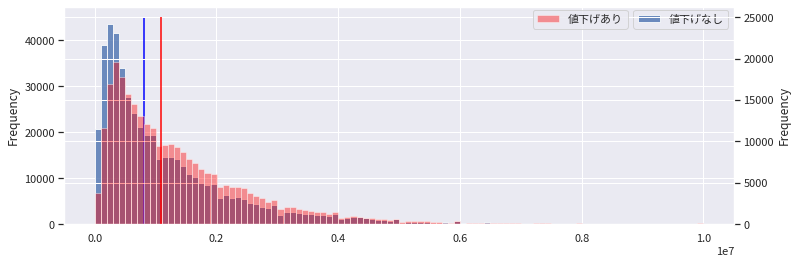

In [65]:
plt.rcParams['font.family'] = 'Noto Sans CJK JP'
fig, axes = plt.subplots(1,1, figsize=(12, 4))
axes0=axes.twinx()

df[(df.diff_price.eq(0)) & (df.max_price <= 1e7)].drop_duplicates(subset=['stock_id']).max_price.plot.hist(bins=100, ax=axes, alpha=0.8, label='値下げなし')
axes.legend(loc=(0.85,0.9))
axes.vlines(818000,ymin=0, ymax=45000, color='blue')

df[(df.diff_price.ne(0)) & (df.max_price <= 1e7)].drop_duplicates(subset=['stock_id']).max_price.plot.hist(bins=100, ax=axes0, color='red', alpha=0.4, label='値下げあり')
axes0.legend(loc=(0.7,0.9))

axes0.vlines(1089000,ymin=0, ymax=25000,color='red')

In [43]:
df[(df.diff_price.ne(0)) & (df.min_price <= 1e7)].drop_duplicates(subset=['stock_id']).price.median()\
,df[(df.diff_price.ne(0)) & (df.min_price <= 1e7)].drop_duplicates(subset=['stock_id']).price.mean()

(1089000.0, 1484826.3671508986)

In [44]:
df[(df.diff_price.eq(0)) & (df.min_price <= 1e7)].drop_duplicates(subset=['stock_id']).price.median()\
,df[(df.diff_price.eq(0)) & (df.min_price <= 1e7)].drop_duplicates(subset=['stock_id']).price.mean()

(818000.0, 1265387.6824528002)

In [105]:
df[(df.diff_price.eq(0)) & (df.max_price <= 1e7) & (df.car_name == 'ヴェルファイア')].drop_duplicates(subset=['stock_id']).max_price.median()\
, df[(df.diff_price.ne(0)) & (df.max_price <= 1e7) & (df.car_name == 'ヴェルファイア')].drop_duplicates(subset=['stock_id']).max_price.median()

(1858000.0, 2030000.0)

In [107]:
df.loc[:, 'diff_days'] = df['end_day']-df['start_day']
df.loc[:, 'diff_days'] = df['diff_days'].astype('timedelta64[D]')

In [207]:
stock_optinos[['e_distance', 'price']] = stock_optinos[['e_distance', 'price']].astype(int, errors='ignore')

In [213]:
stock_optinos.sort_values(by='e_distance')

,stock_id,goo_car_id,n_p_country_nm_n,n_p_brand_nm_n,n_p_car_nm_n,n_p_grade_nm_n,syear,e_distance,price
3680900,0902732A30191003W001,700090273230191003001,日本,スズキ,スズキ,スズキ セニアカーＥＴ４Ｅ,0,0,160000
741708,0402973A20200208M004,936020020900402973004,日本,スズキ,ワゴンＲ,ＦＡ キーレス ＣＤオーディオ 届け出済み未使用車 禁煙車,2019,0,699000
2699917,0705628A20200608D004,939020060900705628004,日本,ダイハツ,ムーヴキャンバス,Ｇブラックアクセントリミテッド ＳＡＩＩＩ,2019,0,1398000
3491284,0205157A20200425D005,939020042600205157005,日本,ダイハツ,タント,カスタムＲＳ ９型ＳＤナビ スマートパノラマパーキングパック,2019,0,1795000
1689952,0707046A30210512W001,700070704630210512001,日本,スズキ,スペーシアカスタム,ハイブリッドＧＳ,2021,0,1649000
...,...,...,...,...,...,...,...,...,...
9582776,1002592A20201120D005,988020112101002592005,日本,スバル,インプレッサスポーツ,１．６ｉ,2015,None,699000
9585881,1101157A30171011W001,700110115730171011001,日本,日産,セレナ,ハイウェイスター Ｖセレ＋セーフティ ＳＨＶ Ａセフ,2015,None,2123000
9589645,0500723A30200516W006,700050072330200516006,日本,トヨタ,８６,ＧＴ ナビＴＶ ＥＴＣ プッシュスタート ＬＥＤヘッドライト,2018,None,1988000
9599641,0508760A20211027J002,941021102800508760002,日本,スバル,レガシィＢ４,リミテッド,2015,None,1749000


In [217]:
# stock_optinos = stock_optinos[(stock_optinos['e_distance'].astype(str).str.isdigit())& (stock_optinos['price'].astype(str).str.isdigit())]

# stock_optinos[['e_distance', 'price']] = stock_optinos[['e_distance', 'price']].astype(int, errors='ignore')

In [ ]:
stock_optinos[(stock_optinos.price != '999999999')&(stock_optinos.price !='price')].sort_values(by=['n_p_car_nm_n', 'e_distance', 'price'])[['n_p_car_nm_n', 'e_distance', 'price']].head(100)

In [299]:
def plt_car_maxprice_dist(car_name):
    price_median_nodiscount = df[(df.diff_price.eq(0)) & (df.max_price <= 1e7) & (df.car_name == car_name)].drop_duplicates(subset=['stock_id']).max_price.median()
    diff_days_nodiscount = df[(df.diff_price.eq(0)) & (df.max_price <= 1e7) & (df.car_name == car_name)].drop_duplicates(subset=['stock_id']).diff_days.median()
    price_median_discount = df[(df.diff_price.ne(0)) & (df.max_price <= 1e7) & (df.car_name == car_name)].drop_duplicates(subset=['stock_id']).max_price.median()
    diff_days_discount = df[(df.diff_price.ne(0)) & (df.max_price <= 1e7) & (df.car_name == car_name)].drop_duplicates(subset=['stock_id']).diff_days.median()
    print(f'price_median_Nodiscount      :{price_median_nodiscount}')
    print(f'price_median_Discount        :{price_median_discount}')
    
    print(f'keisai_day_median_Nodiscount :{diff_days_nodiscount}')
    print(f'keisai_day_median_Discount   :{diff_days_discount}')
    
    
    fig, axes = plt.subplots(1,1 ,figsize=(8 ,5))
    axes0 = axes.twinx()
    df[(df.diff_price.eq(0)) & (df.max_price <= 1e7) & (df.car_name == car_name)].drop_duplicates(subset=['stock_id']).diff_days.plot.hist(bins=50 ,ax=axes, alpha=0.8, label='値下げなし')
    axes.legend(loc=(0.7, 0.9))
    df[(df.diff_price.ne(0)) & (df.max_price <= 1e7) & (df.car_name == car_name)].drop_duplicates(subset=['stock_id']).diff_days.plot.hist(bins=50,ax=axes0, color='red', alpha=0.4, label='値下げあり')
    axes0.legend(loc=(0.45, 0.9))

    
    plt.title(f'{car_name}')
    plt.show()

In [305]:
def plt_car_minprice_dist(car_name):
    price_median_nodiscount = df[(df.diff_price.eq(0)) & (df.max_price <= 1e7) & (df.car_name == car_name)].drop_duplicates(subset=['stock_id']).min_price.median()
    diff_days_nodiscount = df[(df.diff_price.eq(0)) & (df.max_price <= 1e7) & (df.car_name == car_name)].drop_duplicates(subset=['stock_id']).diff_days.median()
    price_median_discount = df[(df.diff_price.ne(0)) & (df.max_price <= 1e7) & (df.car_name == car_name)].drop_duplicates(subset=['stock_id']).min_price.median()
    diff_days_discount = df[(df.diff_price.ne(0)) & (df.max_price <= 1e7) & (df.car_name == car_name)].drop_duplicates(subset=['stock_id']).diff_days.median()
    print(f'price_median_Nodiscount      :{price_median_nodiscount}')
    print(f'price_median_Discount        :{price_median_discount}')
    
    print(f'keisai_day_median_Nodiscount :{diff_days_nodiscount}')
    print(f'keisai_day_median_Discount   :{diff_days_discount}')
    
    
    fig, axes = plt.subplots(1,1 ,figsize=(8 ,5))
    axes0 = axes.twinx()
    df[(df.diff_price.eq(0)) & (df.max_price <= 1e7) & (df.car_name == car_name)].drop_duplicates(subset=['stock_id']).diff_days.plot.hist(bins=50 ,ax=axes, alpha=0.8, label='値下げなし')
    axes.legend(loc=(0.7, 0.9))
    df[(df.diff_price.ne(0)) & (df.max_price <= 1e7) & (df.car_name == car_name)].drop_duplicates(subset=['stock_id']).diff_days.plot.hist(bins=50,ax=axes0, color='red', alpha=0.4, label='値下げあり')
    axes0.legend(loc=(0.45, 0.9))

    
    plt.title(f'{car_name}')
    plt.show()

price_median_Nodiscount      :1858000.0
price_median_Discount        :2030000.0
keisai_day_median_Nodiscount :29.0
keisai_day_median_Discount   :80.0


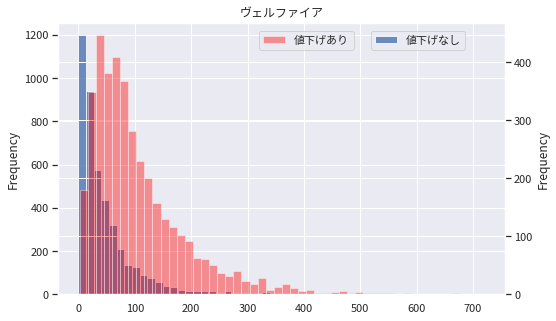

price_median_Nodiscount      :1858000.0
price_median_Discount        :1828000.0
keisai_day_median_Nodiscount :29.0
keisai_day_median_Discount   :80.0


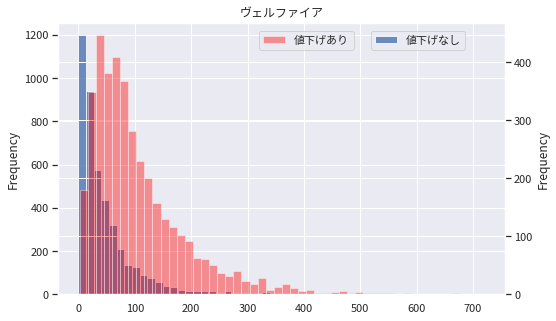

In [306]:
car_name='ヴェルファイア'
plt_car_maxprice_dist(car_name)
plt_car_minprice_dist(car_name)

price_median_Nodiscount      :3490000.0
price_median_Discount        :3548000.0
keisai_day_median_Nodiscount :24.0
keisai_day_median_Discount   :77.0


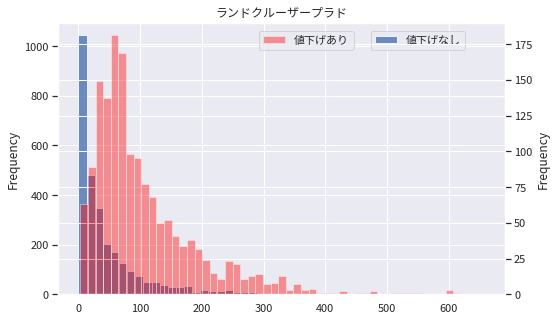

price_median_Nodiscount      :3490000.0
price_median_Discount        :3299000.0
keisai_day_median_Nodiscount :24.0
keisai_day_median_Discount   :77.0


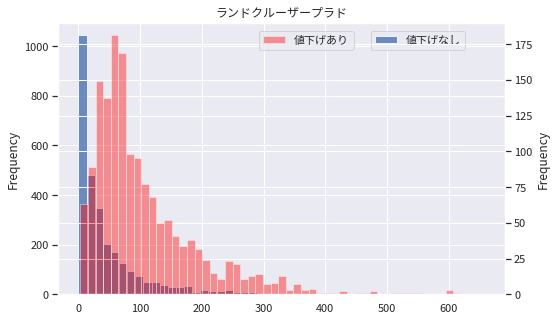

In [307]:
car_name='ランドクルーザープラド'
plt_car_maxprice_dist(car_name)
plt_car_minprice_dist(car_name)

price_median_Nodiscount      :999500.0
price_median_Discount        :1380000.0
keisai_day_median_Nodiscount :29.0
keisai_day_median_Discount   :77.0


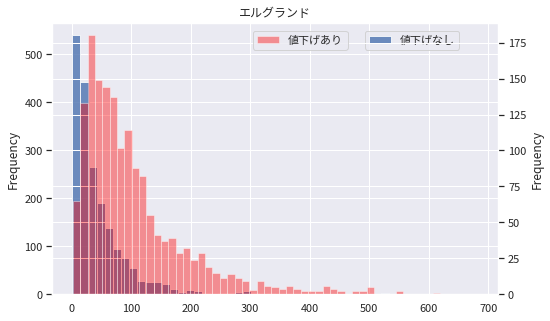

price_median_Nodiscount      :999500.0
price_median_Discount        :1198000.0
keisai_day_median_Nodiscount :29.0
keisai_day_median_Discount   :77.0


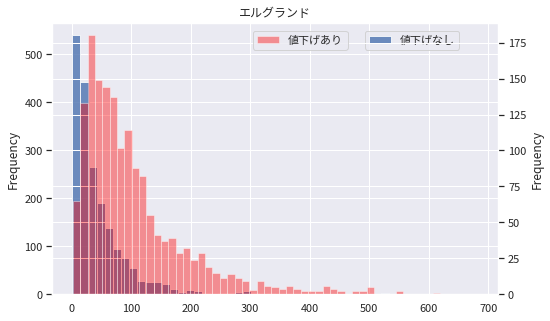

In [308]:
car_name='エルグランド'
plt_car_maxprice_dist(car_name)
plt_car_minprice_dist(car_name)

price_median_Nodiscount      :899000.0
price_median_Discount        :999000.0
keisai_day_median_Nodiscount :27.0
keisai_day_median_Discount   :79.0


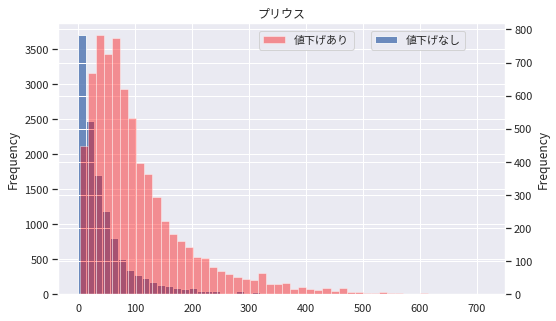

price_median_Nodiscount      :899000.0
price_median_Discount        :890000.0
keisai_day_median_Nodiscount :27.0
keisai_day_median_Discount   :79.0


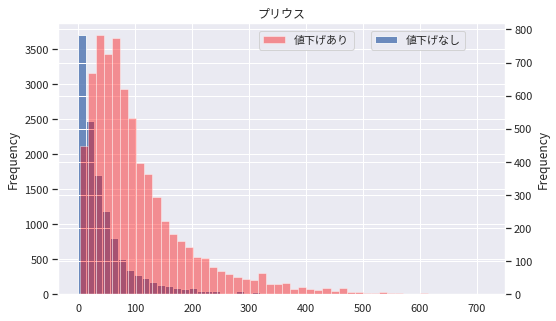

In [309]:
car_name='プリウス'
plt_car_maxprice_dist(car_name)
plt_car_minprice_dist(car_name)

price_median_Nodiscount      :358000.0
price_median_Discount        :580000.0
keisai_day_median_Nodiscount :31.0
keisai_day_median_Discount   :89.0


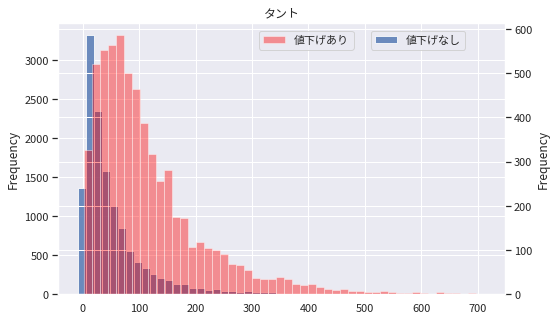

price_median_Nodiscount      :358000.0
price_median_Discount        :488000.0
keisai_day_median_Nodiscount :31.0
keisai_day_median_Discount   :89.0


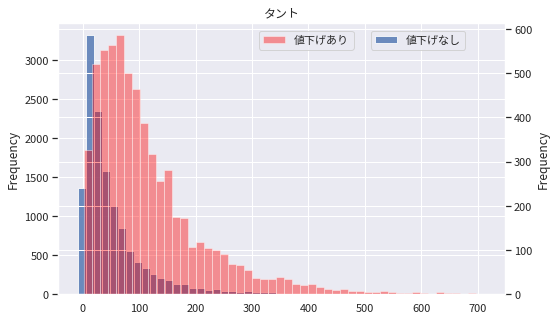

In [310]:
car_name='タント'
plt_car_maxprice_dist(car_name)
plt_car_minprice_dist(car_name)

price_median_Nodiscount      :798000.0
price_median_Discount        :1090000.0
keisai_day_median_Nodiscount :35.0
keisai_day_median_Discount   :93.0


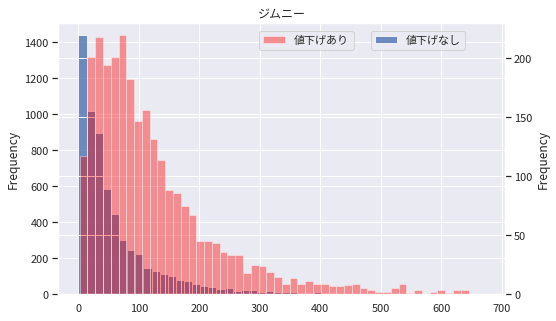

price_median_Nodiscount      :798000.0
price_median_Discount        :948000.0
keisai_day_median_Nodiscount :35.0
keisai_day_median_Discount   :93.0


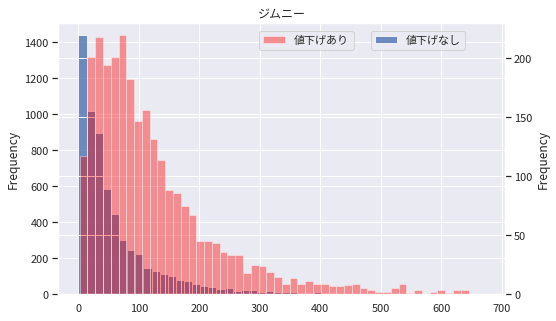

In [311]:
car_name='ジムニー'
plt_car_maxprice_dist(car_name)
plt_car_minprice_dist(car_name)

price_median_Nodiscount      :230000.0
price_median_Discount        :349000.0
keisai_day_median_Nodiscount :33.0
keisai_day_median_Discount   :94.0


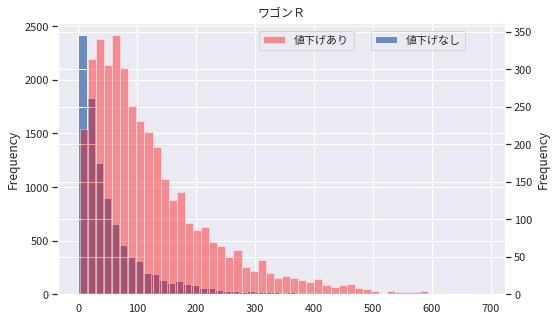

price_median_Nodiscount      :230000.0
price_median_Discount        :279000.0
keisai_day_median_Nodiscount :33.0
keisai_day_median_Discount   :94.0


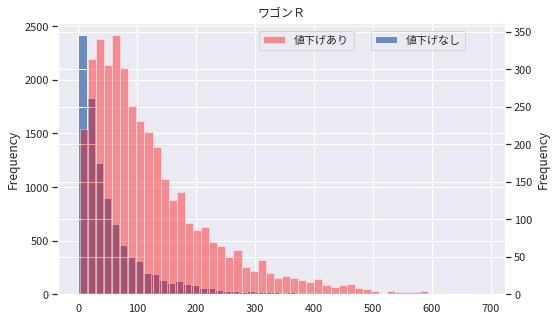

In [312]:
car_name='ワゴンＲ'
plt_car_maxprice_dist(car_name)
plt_car_minprice_dist(car_name)

price_median_Nodiscount      :2175000.0
price_median_Discount        :2280000.0
keisai_day_median_Nodiscount :32.0
keisai_day_median_Discount   :78.0


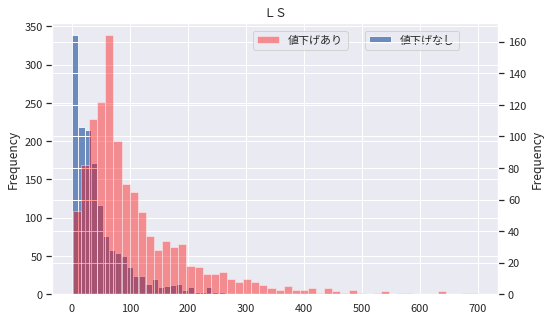

price_median_Nodiscount      :2175000.0
price_median_Discount        :1999000.0
keisai_day_median_Nodiscount :32.0
keisai_day_median_Discount   :78.0


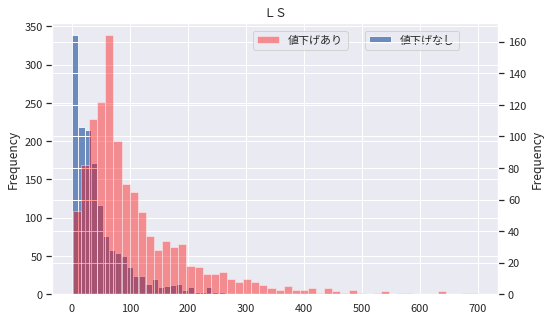

In [313]:
car_name='ＬＳ'
plt_car_maxprice_dist(car_name)
plt_car_minprice_dist(car_name)

price_median_Nodiscount      :625500.0
price_median_Discount        :790000.0
keisai_day_median_Nodiscount :36.0
keisai_day_median_Discount   :86.0


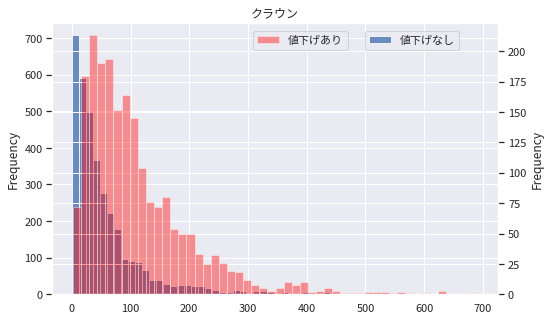

price_median_Nodiscount      :625500.0
price_median_Discount        :660000.0
keisai_day_median_Nodiscount :36.0
keisai_day_median_Discount   :86.0


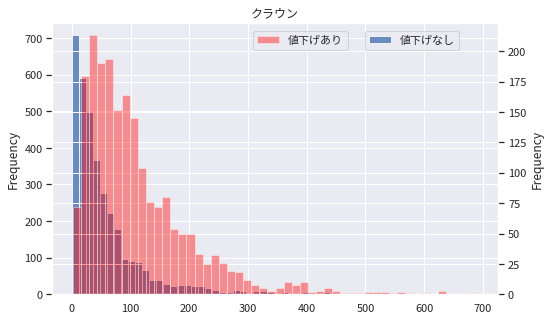

In [314]:
car_name='クラウン'
plt_car_maxprice_dist(car_name)
plt_car_minprice_dist(car_name)